# HR Analytics
<br>
This repo contains the HR Analytics project as part of my data science portfolio. The objective is to predict employee attrition using a HR dataset from IBM Watson Analytics Sample Data - [HR Employee Attrition & Performance](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) which contains employee data for 1,470 employees with various information about the employees. 



1. [Problem Statement](#problem)
2. [Dataset](#data)
3. [Exploratory Data Analysis](#eda)
4. [Pre-processing Pipeline](#pre)
5. [Building Machine Learning Models](#ml)
6. [Discussion and Conclusion](#conclusion)

# <a name="problem">Problem Statement</a>
Although some staff turnover is inevitable in any company, a high attrition rate is costly. Employee attrition is the overall turnover within a company as existing employees leave and new ones are hired. The attrition rate is usually calculated as the percentage of employees leaving the company over a specified period of time. Recruitment, hiring and training all involve financial costs and a new employee may not be immediately productive in terms of creating profit. The amount of time spent to interview and find a replacement, and the loss of productivity for several months while the new employee gets accustomed to the new role, are indirect costs to the company. These costs can significantly increase if executive-level or highest-paid employees are to be replaced. As such, the costs of replacing employees for most companies are often very significant.

An unusually high employee attrition rate is also considered indicative of problems within the company. Uncompetitive pay scales, micromanagement, ineffective human resource management (HRM) practices and unreasonable expectations can all lead to unacceptable levels of staff turnover. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. 

In this project, I will attempt to answer the following questions: 

- What is the probability of an employee leaving the company? 
- What are the key drivers of an employee leaving the company? 
- What are the recommendations or strategies that can be adopted to improve employee retention?

This is a standard supervised classification problem where the target or label is a binary variable, 0 (active employee), 1 (ex-employee). The objective is to predict employee attrition based on various information about the employee. I will also attempt to generate the probability of an employee leaving the company as our target variable.

# <a name="data">Dataset</a>

The dataset used in this project is IBM Watson Analytics Sample Data - [HR Employee Attrition & Performance](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/). The dataset contains 1,470 rows corresponding to 1,470 employees with their various information. It is also available directly within Watson Analytics as Employee Performance. As mentioned on IBM website, the purpose of the dataset is to

> *Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.*

# <a name="eda">Exploratory Data Analysis</a>

In [151]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
altair                        4.2.0
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyascii                      0.3.2
anyio                         4.8.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
autoviz                       0.1.58
Babel

In [152]:
import xgboost
print(xgboost.__version__)

3.0.2


In [153]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

In [154]:
# read dataset
df_raw =  pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# make a copy of the original source file
df = df_raw.copy()

print("Size of dataset is: {}".format(df.shape))
df.head()

Size of dataset is: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


There are 35 columns and 1,470 rows.

In [155]:
# dataset columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [156]:
# columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [157]:
# groupby column data types
df.columns.groupby(df.dtypes)

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [158]:
# number of columns
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[0], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[1], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[1]])))

No of columns for int64 is 26.
No of columns for object is 9.


In [159]:
# check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [160]:
# summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [161]:
# summary statistics
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


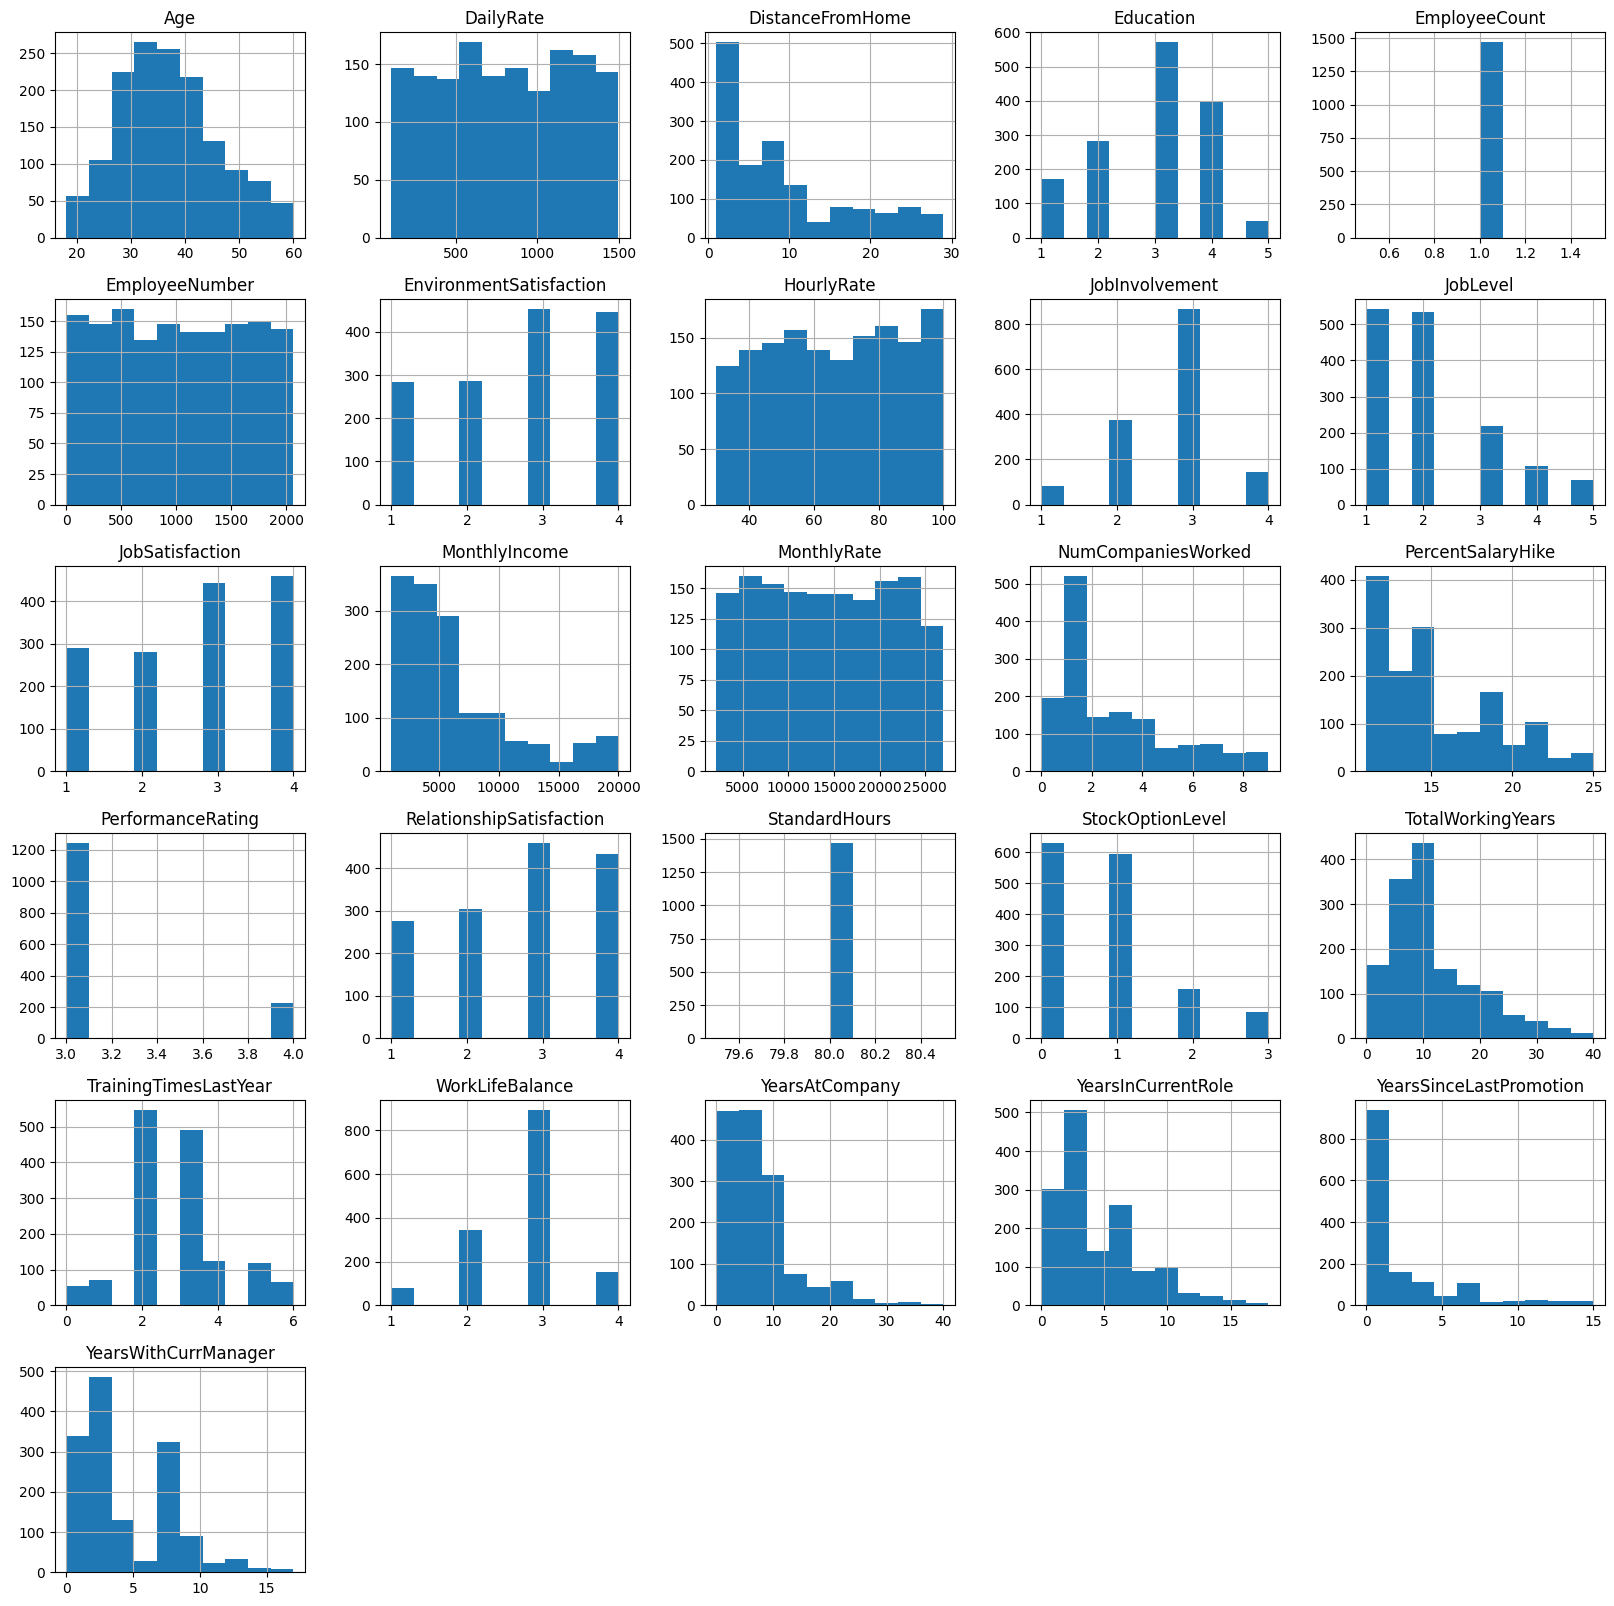

In [162]:
# plot histogram for numeric columns
df.hist(figsize=(20,20))
# plt.savefig("histograms.png", bbox_inches="tight")
plt.show()

---
## Features / Input Variables

### Age
Age of employees is from 18 to 60 years old. The average age of ex-employees at 33.6 years old and 37.6 years old for current employees.

In [163]:
# Age
print("Age of employees is from {} to {} years old.".format(df['Age'].min(), df['Age'].max()))

Age of employees is from 18 to 60 years old.


In [164]:
# Ex-Employees
print("Ex-Employees:")
print("Average Age of Ex-Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))

Ex-Employees:
Average Age of Ex-Employees = 33.6
Standard Deviation = 9.7


In [165]:
# Active Employees
print("Active Employees:")
print("Average Age of Active Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'No', 'Age'])))

Active Employees:
Average Age of Active Employees = 37.6
Standard Deviation = 8.9


We can create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Density plots are representations of the underlying distribution.

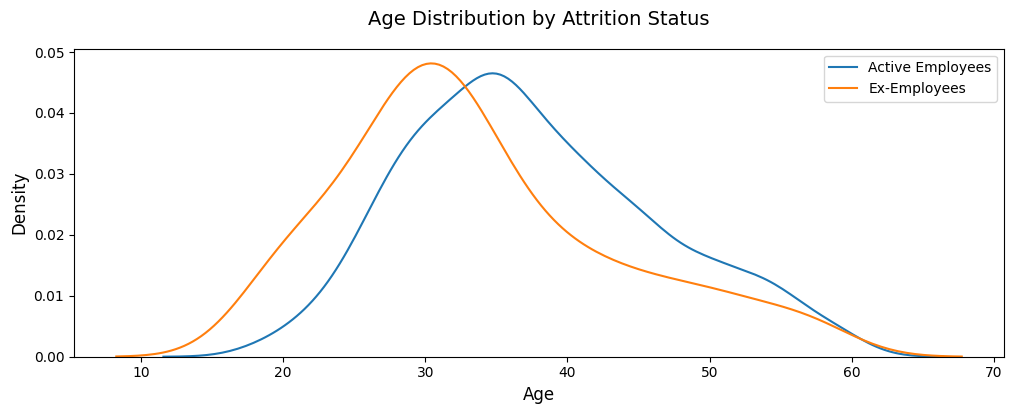

In [166]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(target_0["Age"], label="Active Employees")
sns.kdeplot(target_1["Age"], label="Ex-Employees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

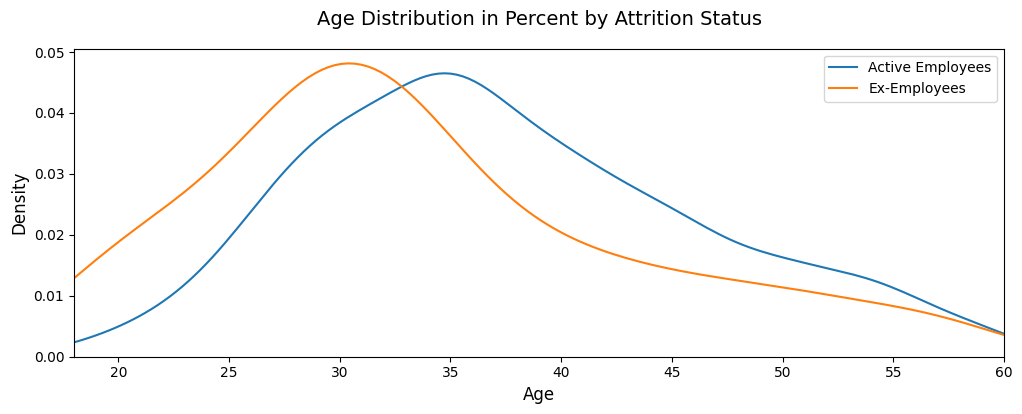

In [167]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(target_0["Age"], label="Active Employees")
sns.kdeplot(target_1["Age"], label="Ex-Employees")
plt.legend()
plt.xlim(df["Age"].min(), df["Age"].max())
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution in Percent by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

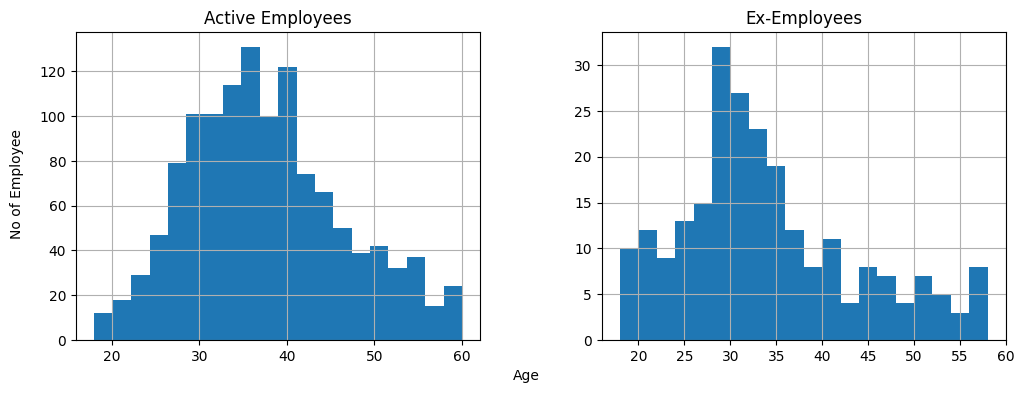

In [168]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['Age']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['Age']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("age_hist.png", bbox_inches="tight")
plt.show()

### Gender
Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17% for Males and 15% for Females.

In [169]:
# Gender of employees
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [170]:
# Gender of employees
df['Gender'].value_counts(normalize=True)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

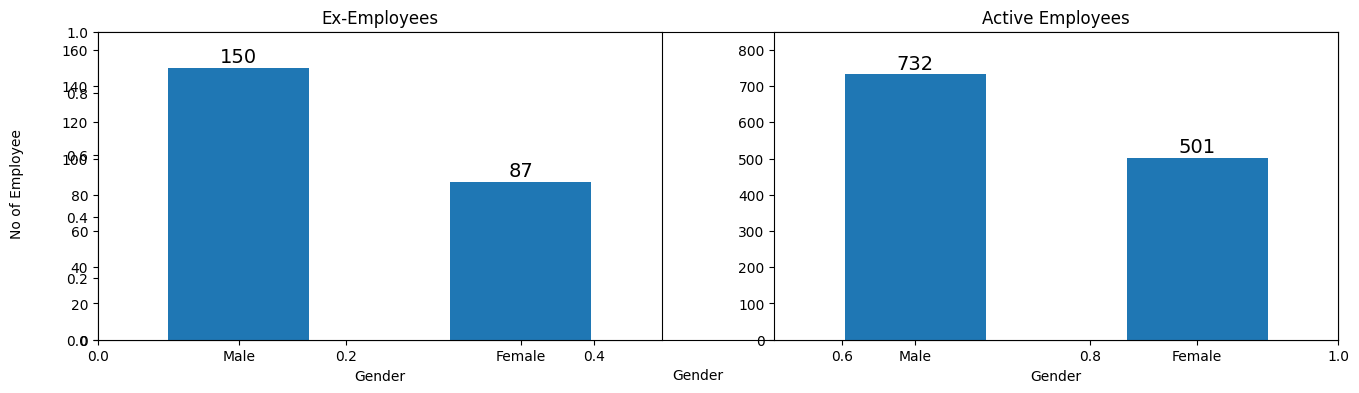

In [171]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()

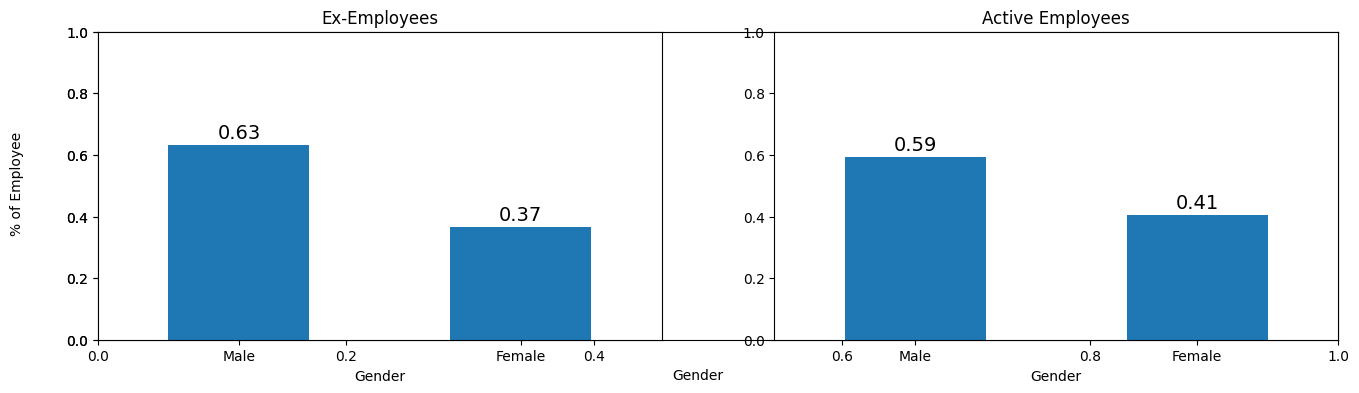

In [172]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_2.png", bbox_inches="tight")
plt.show()

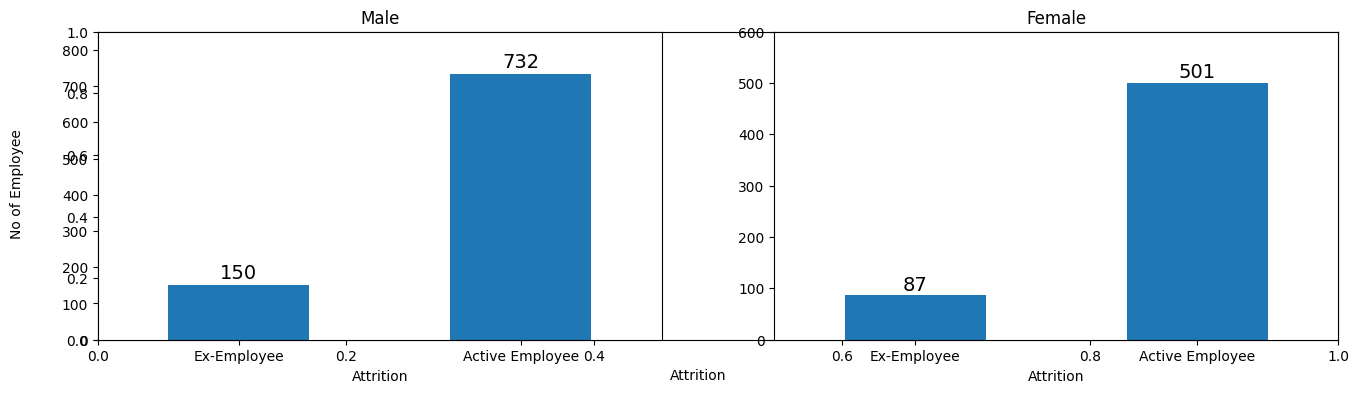

In [173]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_3.png", bbox_inches="tight")
plt.show()

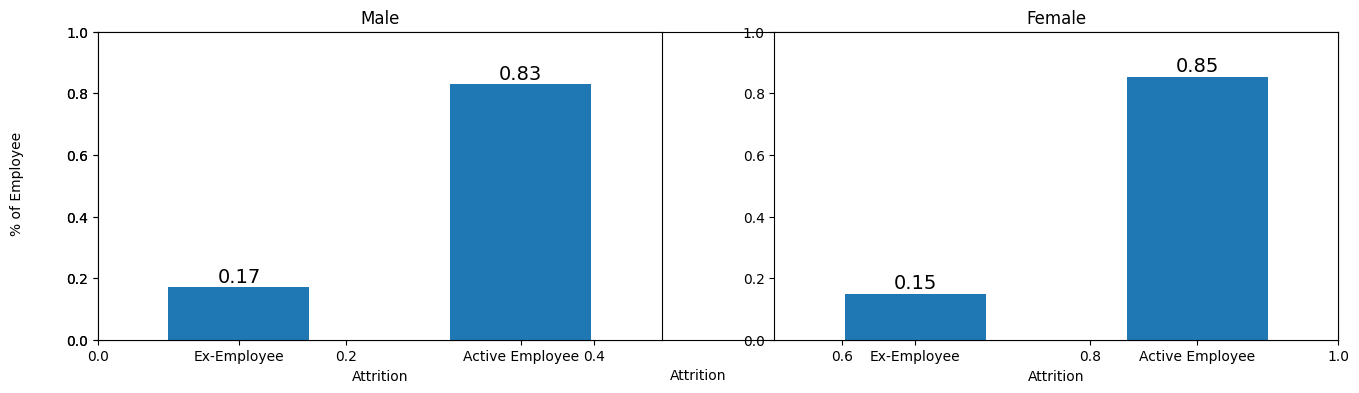

In [174]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.015, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_4.png", bbox_inches="tight")
plt.show()

### Marital Status
The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). 
Single employees show the largest proportion of leavers at 25%.

In [175]:
# marital Status of employees
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [176]:
# marital Status of employees
df['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: proportion, dtype: float64

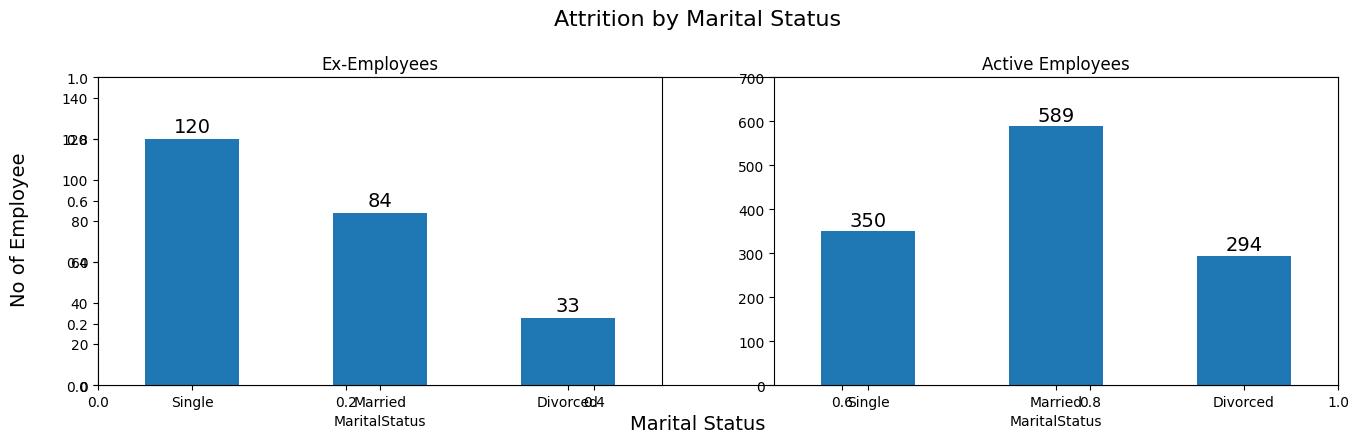

In [177]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'MaritalStatus'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'MaritalStatus'].value_counts().reindex(["Single", "Married","Divorced"]).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition by Marital Status', x=0.5, y=1.05, ha='center', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("marital_hist_1.png", bbox_inches="tight")
plt.show()

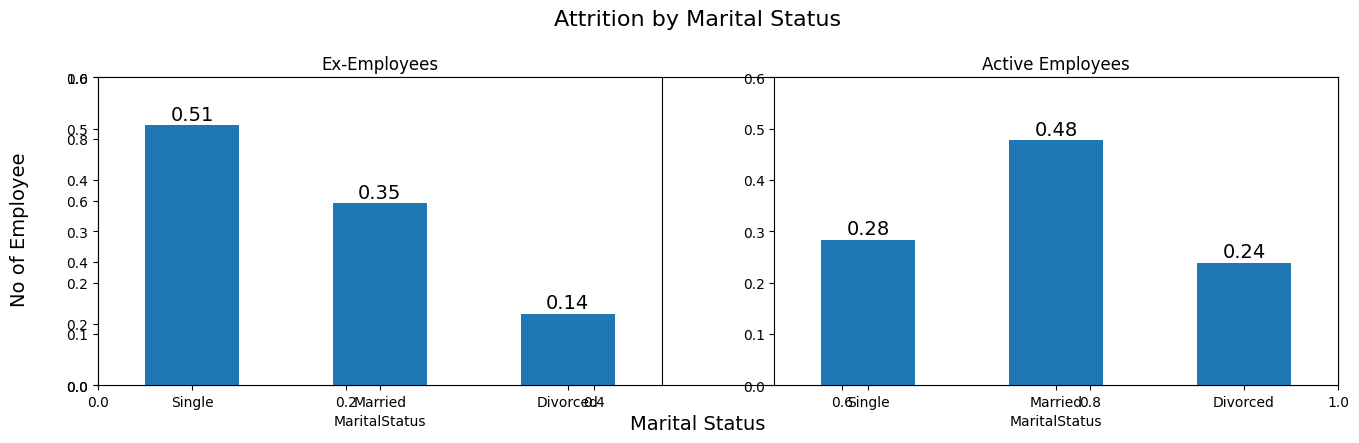

In [178]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "MaritalStatus"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "MaritalStatus"].value_counts(normalize=True).reindex(["Single", "Married","Divorced"]).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition by Marital Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_2.png", bbox_inches="tight")
plt.show()

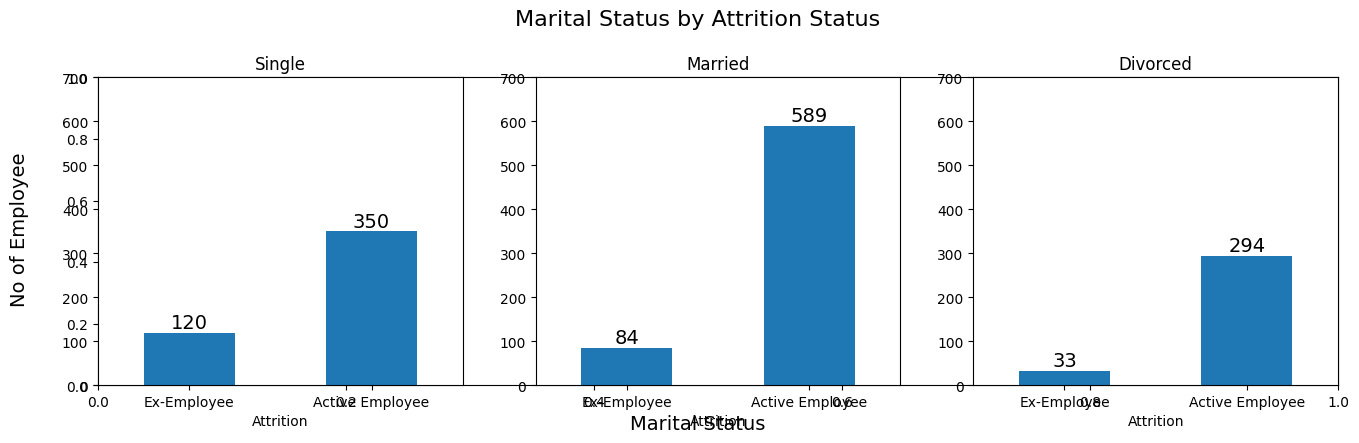

In [179]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_3.png", bbox_inches="tight")
plt.show()

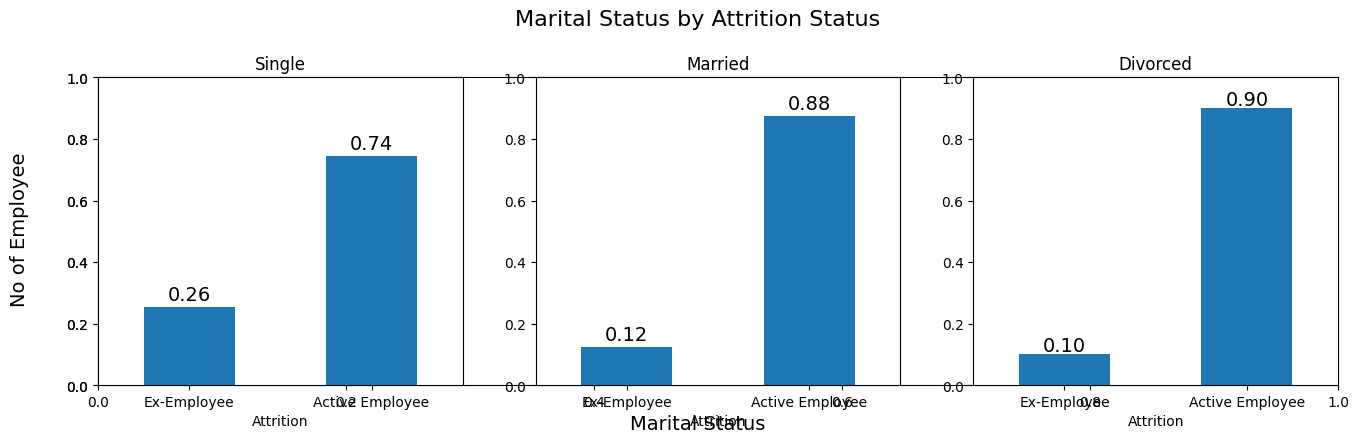

In [180]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_4.png", bbox_inches="tight")
plt.show()

### Distance from Home
Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [181]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(), df['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [182]:
# Ex-Employees
print("Ex-Employees:")
print("Average Distance From Home of Ex-Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))

Ex-Employees:
Average Distance From Home of Ex-Employees = 10.63 miles
Standard Deviation = 8.43


In [183]:
# Active Employees
print("Active Employees:")
print("Average Distance From Home of Active Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))

Active Employees:
Average Distance From Home of Active Employees = 8.92 miles
Standard Deviation = 8.01


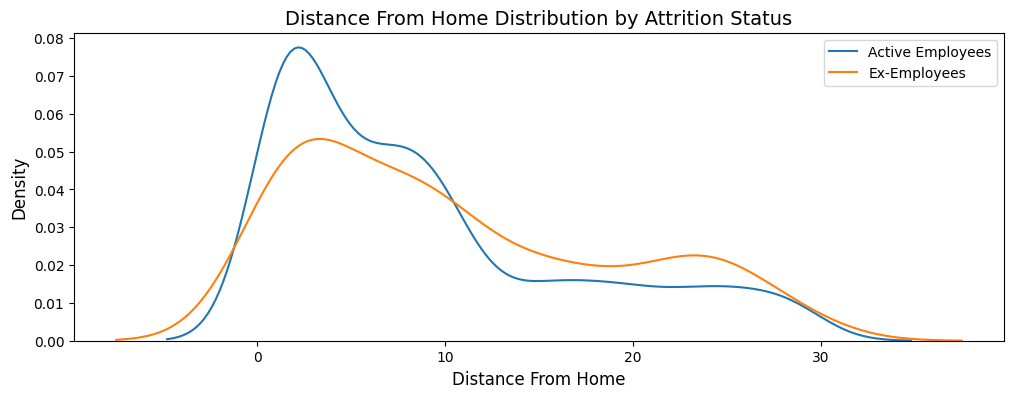

In [184]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="DistanceFromHome", fill=False, label="Active Employees")
sns.kdeplot(data=target_1, x="DistanceFromHome", fill=False, label="Ex-Employees")

plt.legend()
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()

You can get negative x-values ending up with some positive density from a kernel density estimate, simply because of the way KDEs work. Refer https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables and https://www.youtube.com/watch?v=R6_LR-f6Tt4

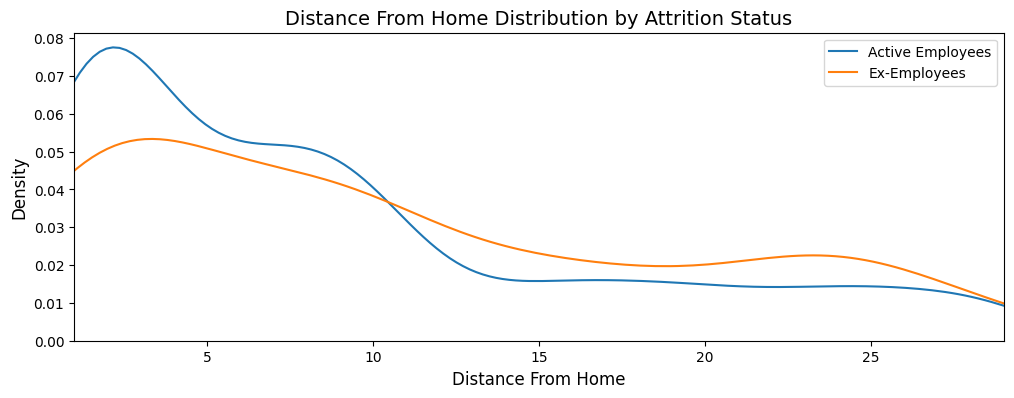

In [185]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="DistanceFromHome", fill=False, label="Active Employees")
sns.kdeplot(data=target_1, x="DistanceFromHome", fill=False, label="Ex-Employees")

plt.legend()
plt.xlim(df["DistanceFromHome"].min(), df["DistanceFromHome"].max())
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()

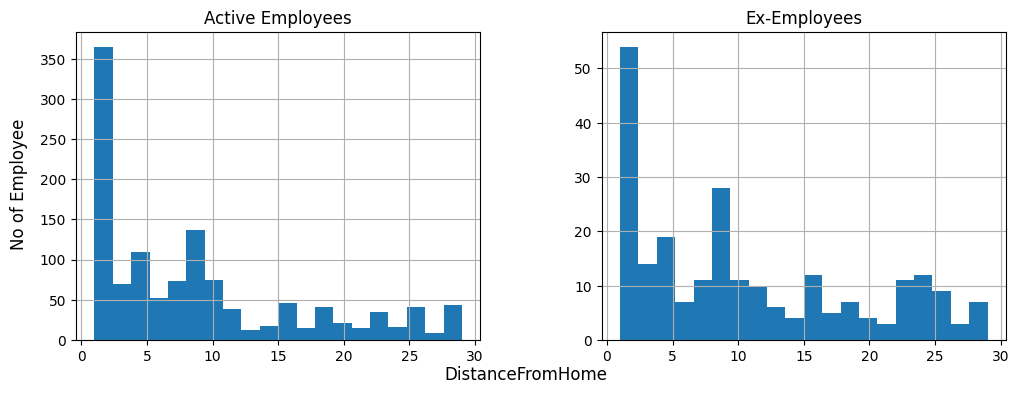

In [186]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['DistanceFromHome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['DistanceFromHome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'DistanceFromHome', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("distance_hist.png", bbox_inches="tight")
plt.show()

### Department
The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [187]:
# departments
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [188]:
# departments
df['Department'].value_counts(normalize=True)

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

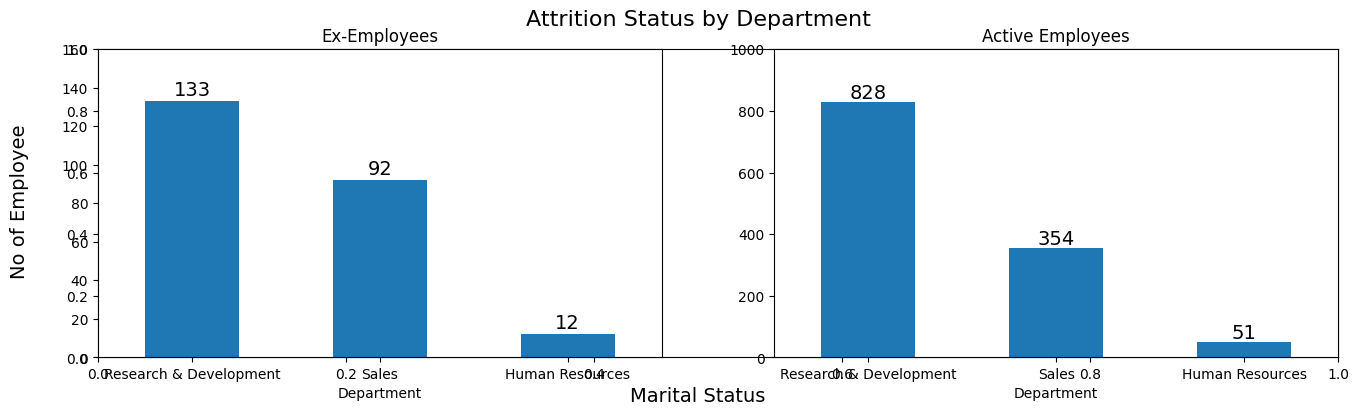

In [189]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Department'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,160)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Department'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Department', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("dept_hist_1.png", bbox_inches="tight")
plt.show()

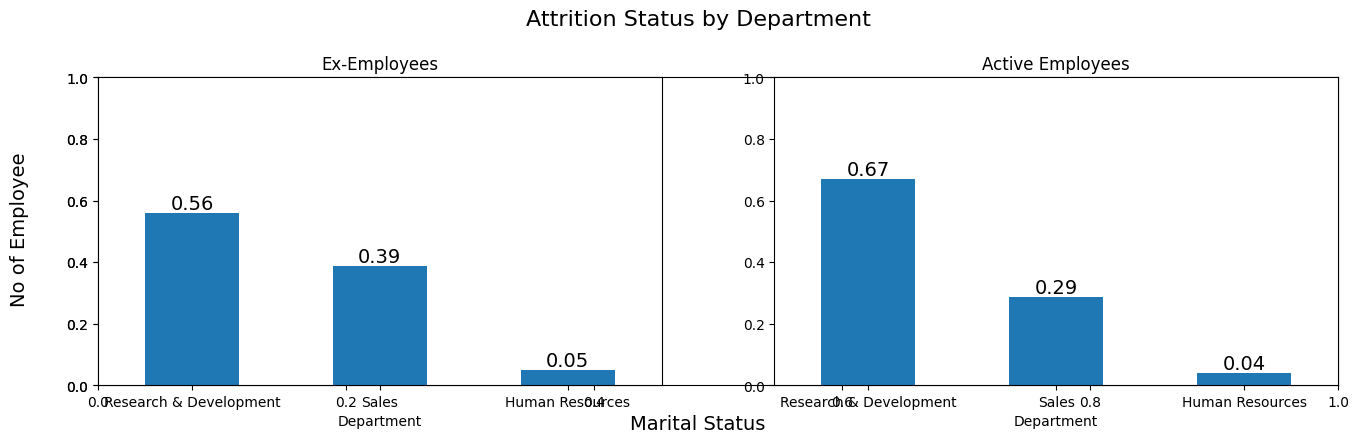

In [190]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "Department"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "Department"].value_counts(normalize=True).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("dept_hist_2.png", bbox_inches="tight")
plt.show()

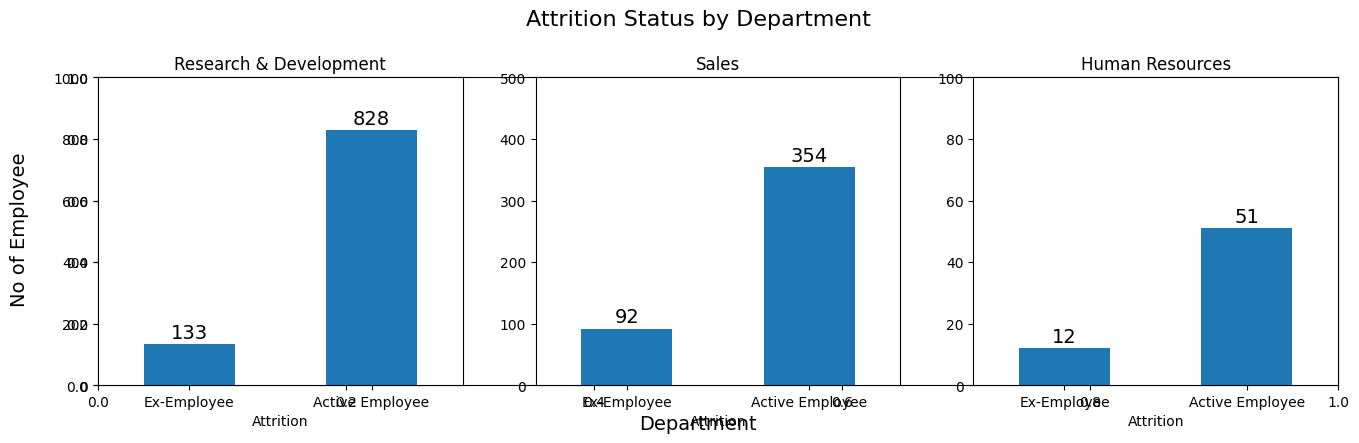

In [191]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,500)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,100)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+2, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Department", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("sdept_hist_3.png", bbox_inches="tight")
plt.show()

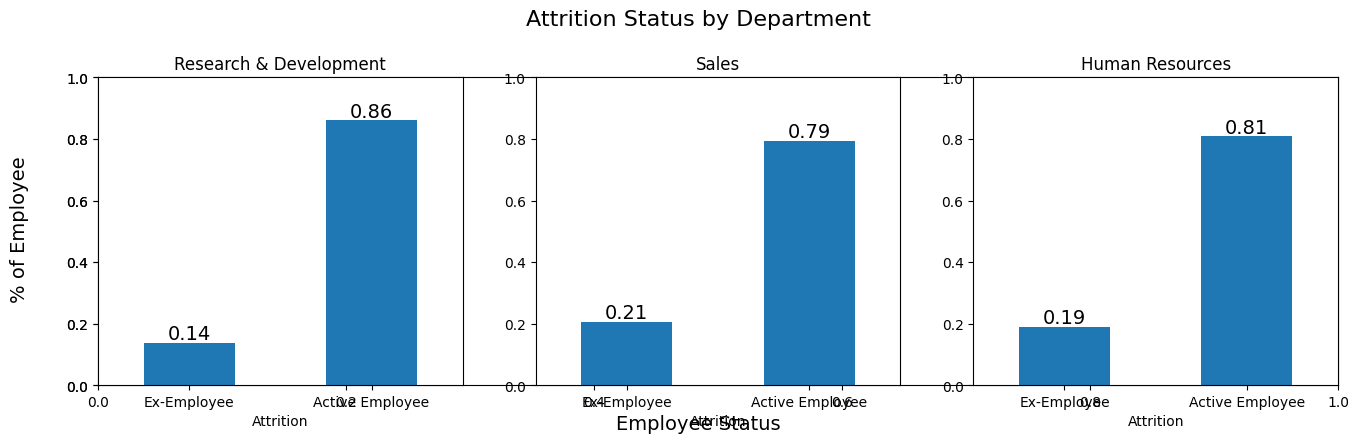

In [192]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Employee Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "% of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("dept_hist_4.png", bbox_inches="tight")
plt.show()

### Job Role
Sale Representative has the highest proportion of leavers, followed by Laboratory Technician and Human Resources.

In [193]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [194]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts(normalize=True)

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: proportion, dtype: float64

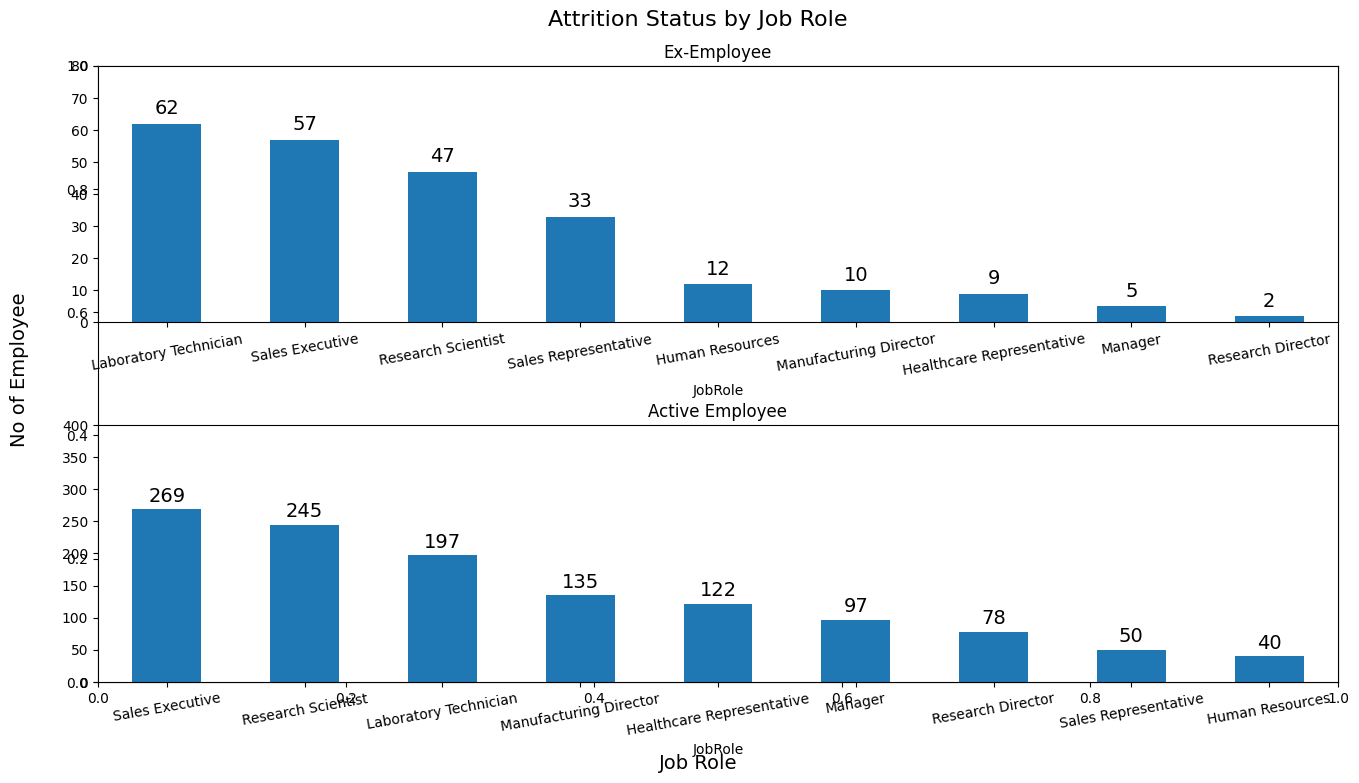

In [195]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,80)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts().plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_1.png", bbox_inches="tight")
plt.show()

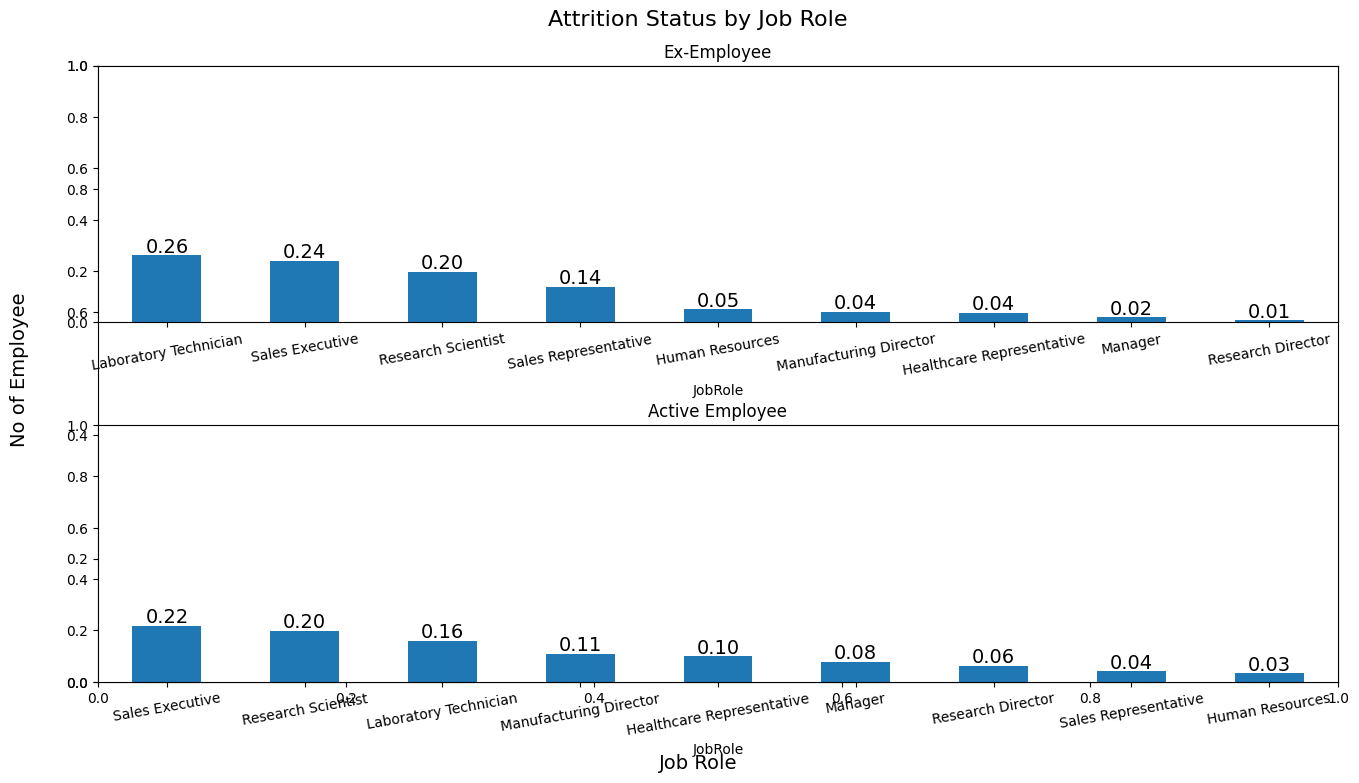

In [196]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_2.png", bbox_inches="tight")
plt.show()

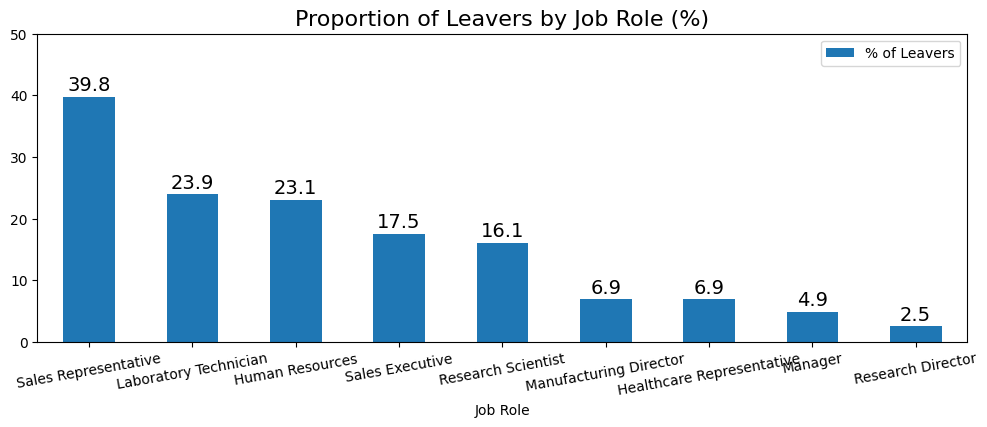

In [197]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
g = df_JR.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Role (%)",  fontsize=16)
plt.xticks(rotation=10)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("role_hist_3.png", bbox_inches="tight")
plt.show()

### Job Level
Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [198]:
# breakdown by job level
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [199]:
# breakdown by job level
df['JobLevel'].value_counts(normalize=True)

JobLevel
1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: proportion, dtype: float64

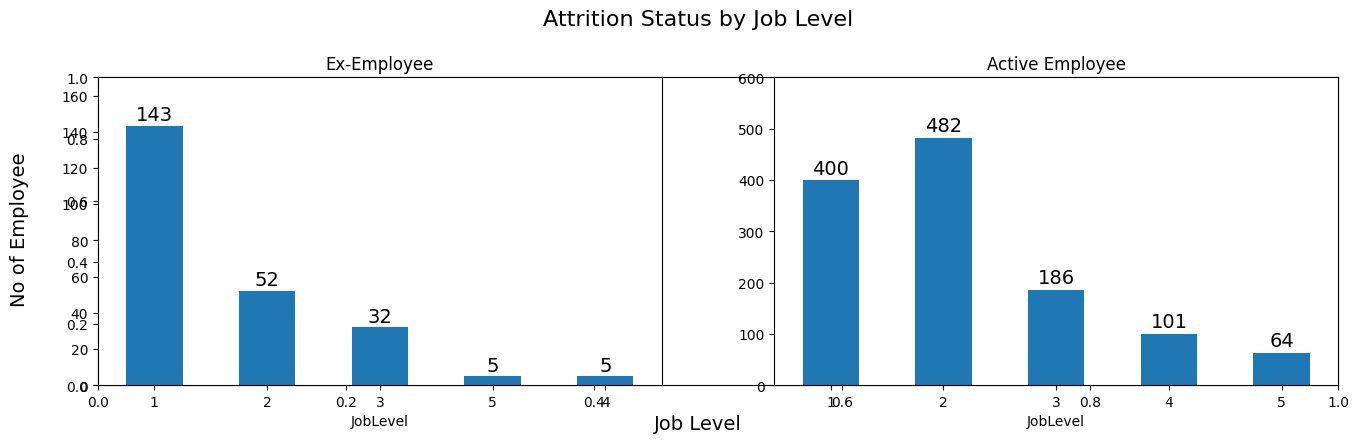

In [200]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts().reindex([1,2,3,4,5]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_1.png", bbox_inches="tight")
plt.show()

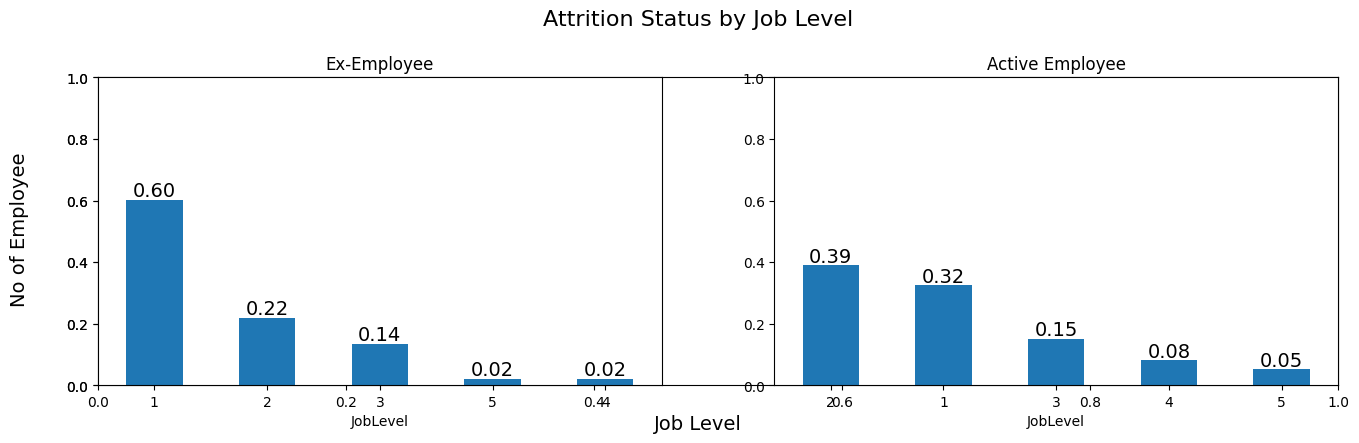

In [201]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_2.png", bbox_inches="tight")
plt.show()

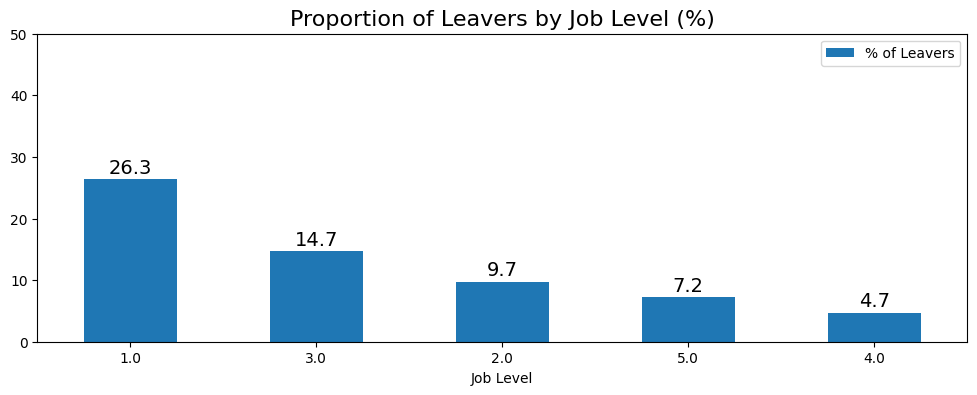

In [202]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
g = df_JL.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Level (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("level_hist_3.png", bbox_inches="tight")
plt.show()

### Years at the Company

The average number of years at the company for currently active employees is 7.37 years and ex-employees is 5.13 years.

In [203]:
# Distance from Home
print("Years At Company for employees is from {} to {} years.".format(df['YearsAtCompany'].min(), df['YearsAtCompany'].max()))

Years At Company for employees is from 0 to 40 years.


In [204]:
# Ex-Employees
print("Ex-Employees:")
print("Average Years At Company of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))

Ex-Employees:
Average Years At Company of Ex-Employees = 5.13 years
Standard Deviation = 5.94


In [205]:
# Active Employees
print("Active Employees:")
print("Average Years At Company of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'])))

Active Employees:
Average Years At Company of Active Employees = 7.37 years
Standard Deviation = 6.09


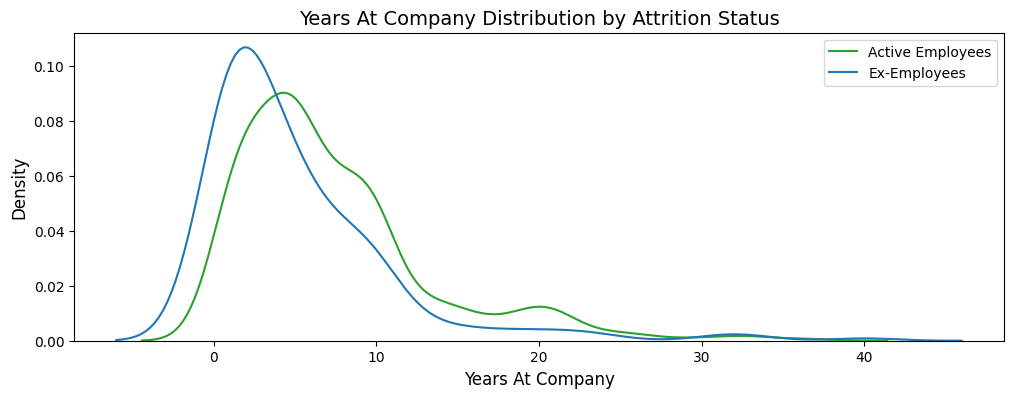

In [206]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="YearsAtCompany", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="YearsAtCompany", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)

# plt.savefig("year_kde_1.png", bbox_inches="tight")
plt.show()

You can get negative x-values ending up with some positive density from a kernel density estimate, simply because of the way KDEs work. Refer https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables and https://www.youtube.com/watch?v=R6_LR-f6Tt4

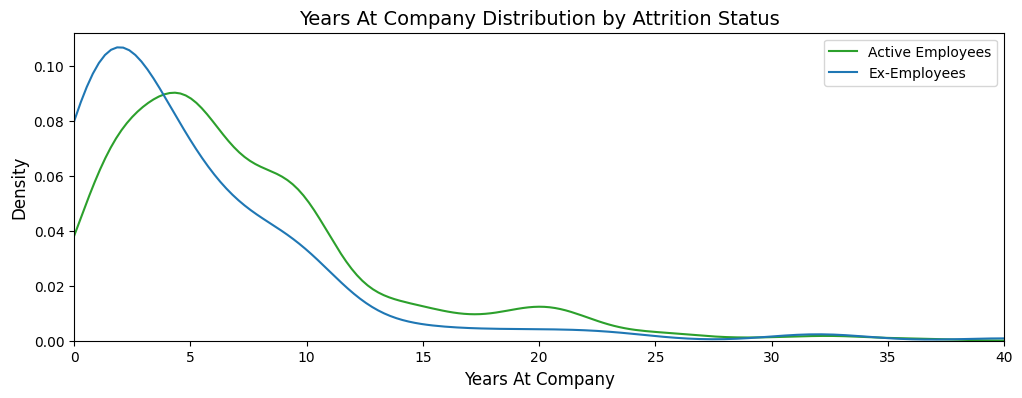

In [207]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="YearsAtCompany", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="YearsAtCompany", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlim(df["YearsAtCompany"].min(), df["YearsAtCompany"].max())
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)

# plt.savefig("year_kde_2.png", bbox_inches="tight")
plt.show()

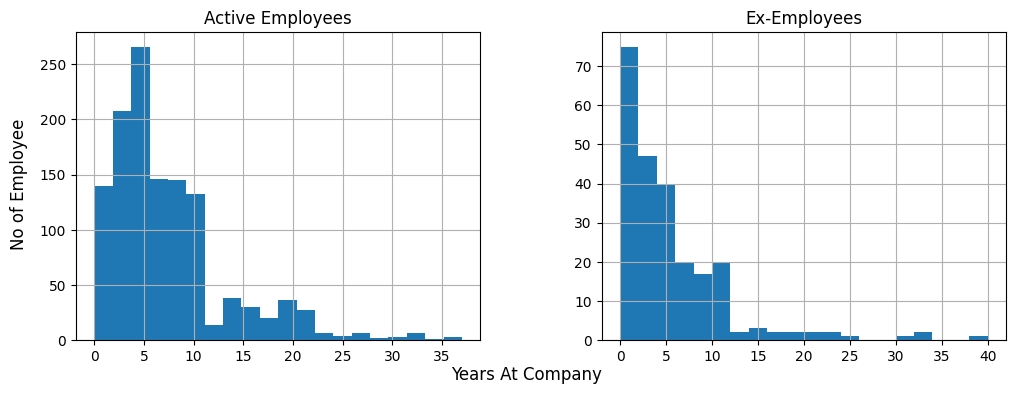

In [208]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsAtCompany']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsAtCompany']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years At Company', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_hist.png"", bbox_inches="tight")
plt.show()

### Overtime

Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [209]:
# breakdown by overtime
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [210]:
# breakdown by overtime
df['OverTime'].value_counts(normalize=True)

OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64

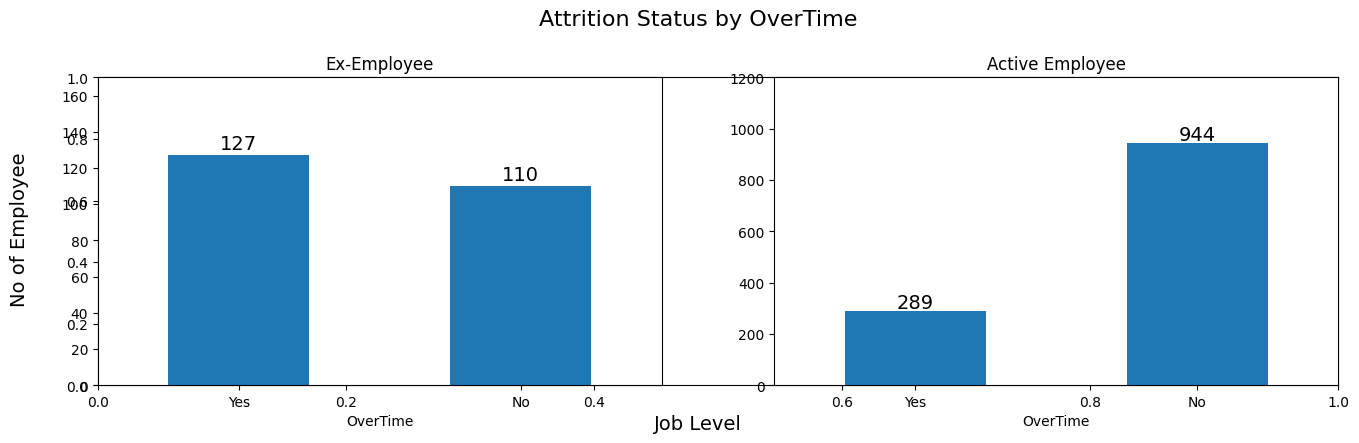

In [211]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1200)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("ot_hist_1.png", bbox_inches="tight")
plt.show()

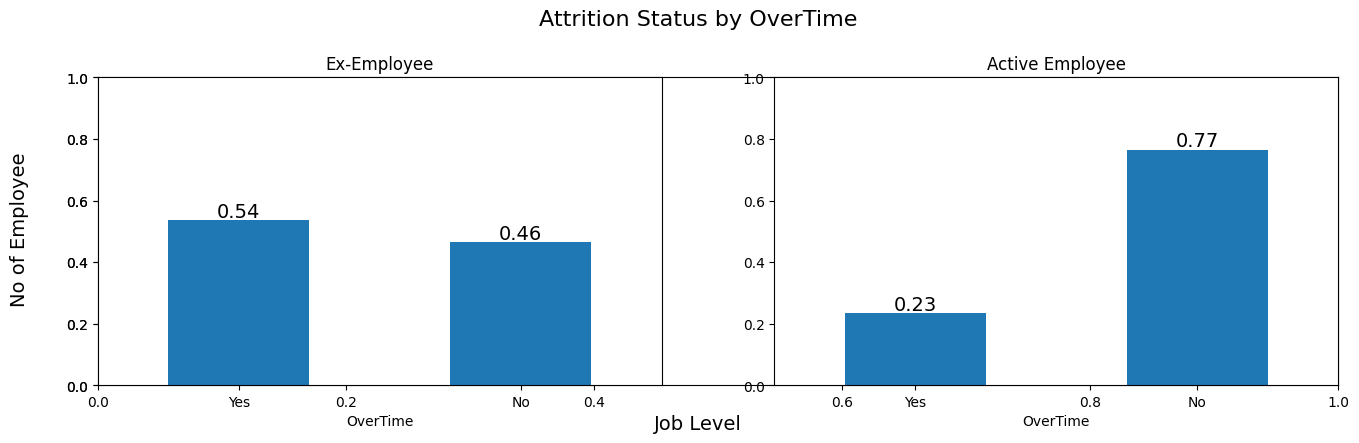

In [212]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("ot_hist_2.png", bbox_inches="tight")
plt.show()

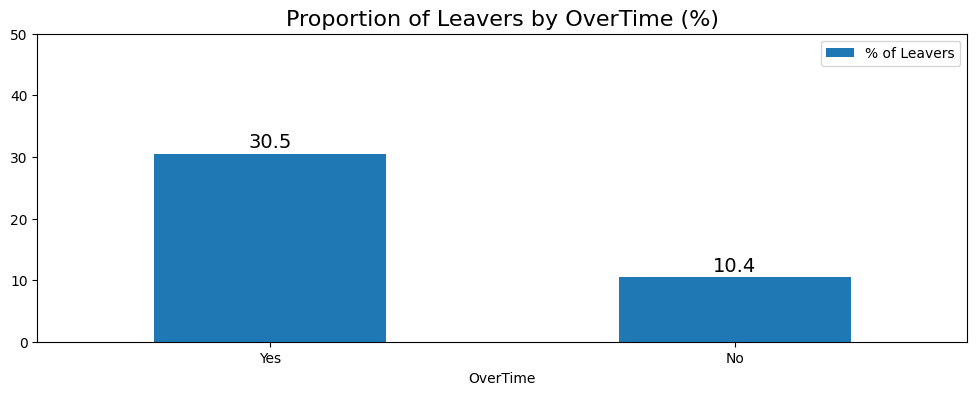

In [213]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
g = df_OT.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by OverTime (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("ot_hist_3.png", bbox_inches="tight")
plt.show()

### Work-Life Balance Score
A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [214]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [215]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts(normalize=True)

WorkLifeBalance
3    0.607483
2    0.234014
4    0.104082
1    0.054422
Name: proportion, dtype: float64

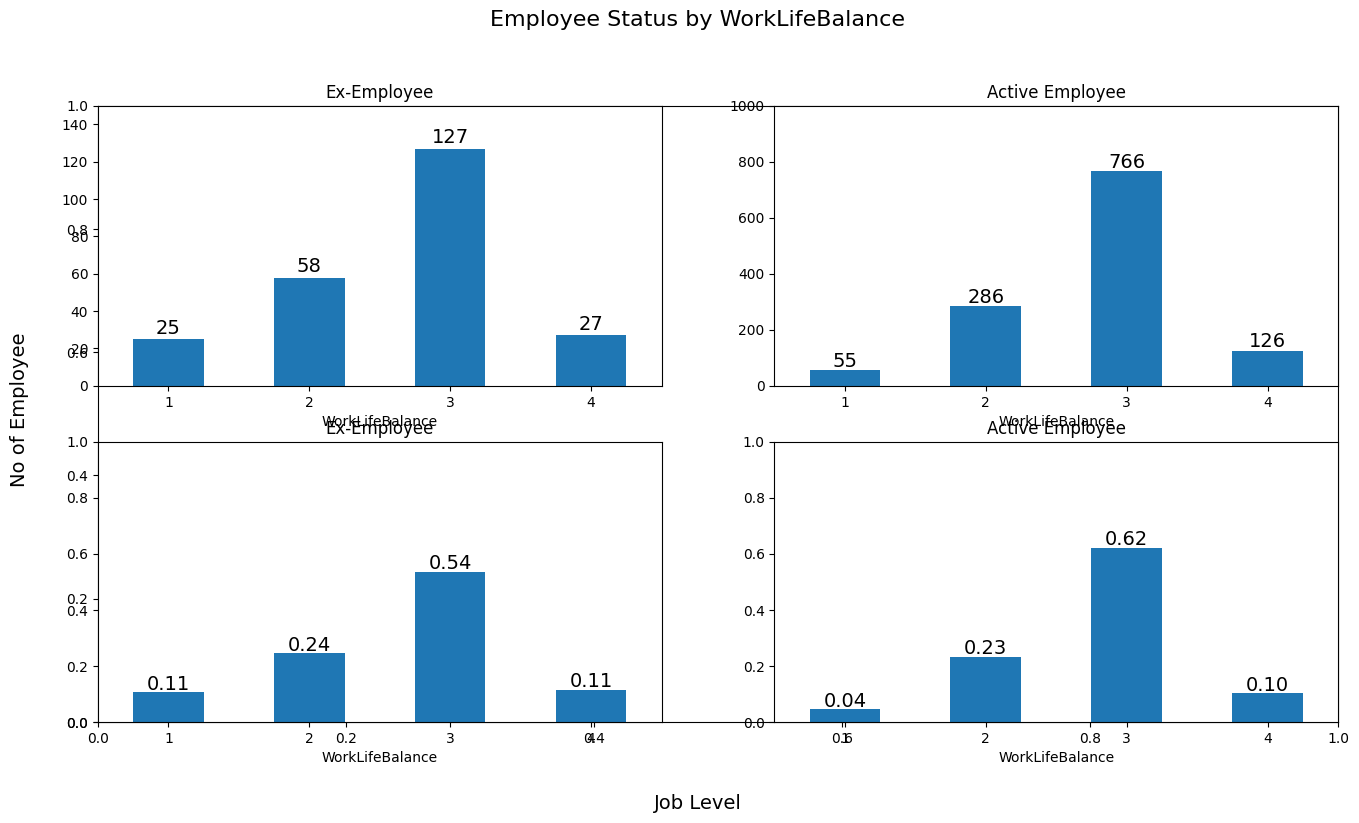

In [216]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(222)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.subplot(223)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Employee Status by WorkLifeBalance', x=0.5, y=1, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("wlb_hist_1.png", bbox_inches="tight")
plt.show()

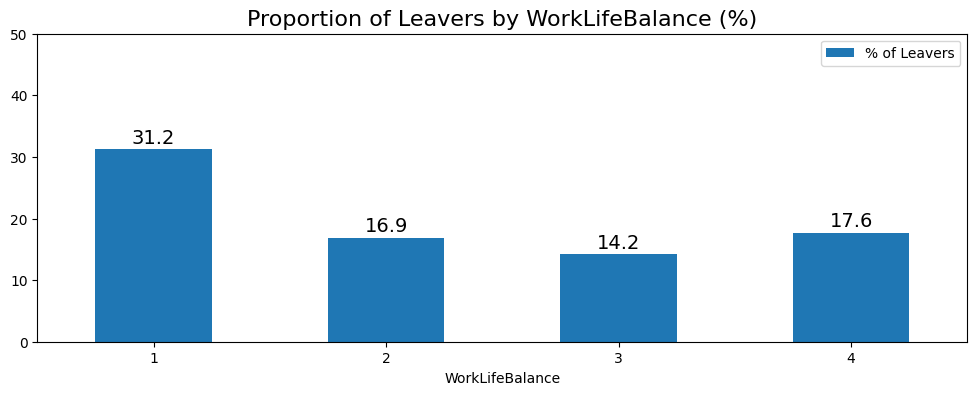

In [217]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
g = df_WLB.sort_values(by=['% of Leavers'], ascending=False).reindex([1,2,3,4]).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by WorkLifeBalance (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("wlb_hist_2.png", bbox_inches="tight")
plt.show()

### Monthly Income

Employee Monthly Income varies from \$1,009 to \$19,999.

In [218]:
# Monthly Income
print("Monthly Income for employees is from ${} to ${}.".format(df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Monthly Income for employees is from $1009 to $19999.


In [219]:
# Ex-Employees
print("Ex-Employees:")
print("Average Monthly Income of Ex-Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))

Ex-Employees:
Average Monthly Income of Ex-Employees = $4787.09
Standard Deviation = $3632.52


In [220]:
# Active Employees
print("Active Employees:")
print("Average Monthly Income of Active Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))

Active Employees:
Average Monthly Income of Active Employees = $6832.74
Standard Deviation = $4816.25


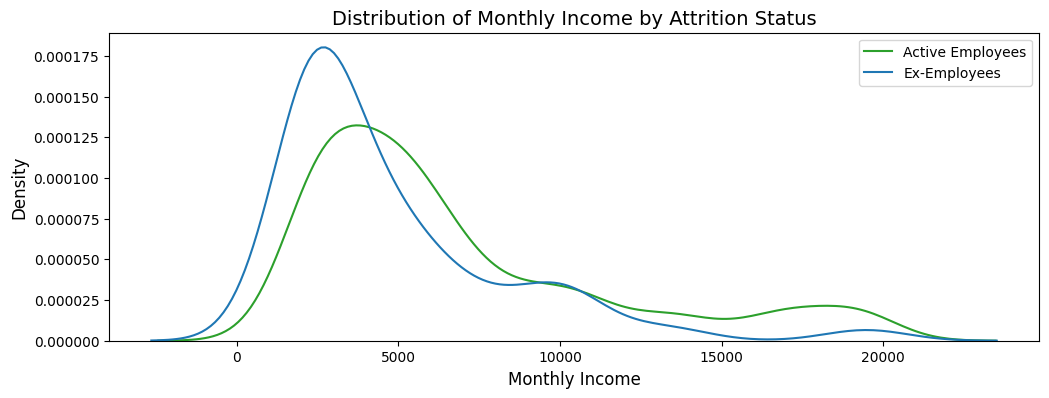

In [221]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="MonthlyIncome", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="MonthlyIncome", fill=False, label="Ex-Employees", color="#1f77b4")

plt.legend()
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_1.png", bbox_inches="tight")
plt.show()

You can get negative x-values ending up with some positive density from a kernel density estimate, simply because of the way KDEs work. Refer https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables and https://www.youtube.com/watch?v=R6_LR-f6Tt4

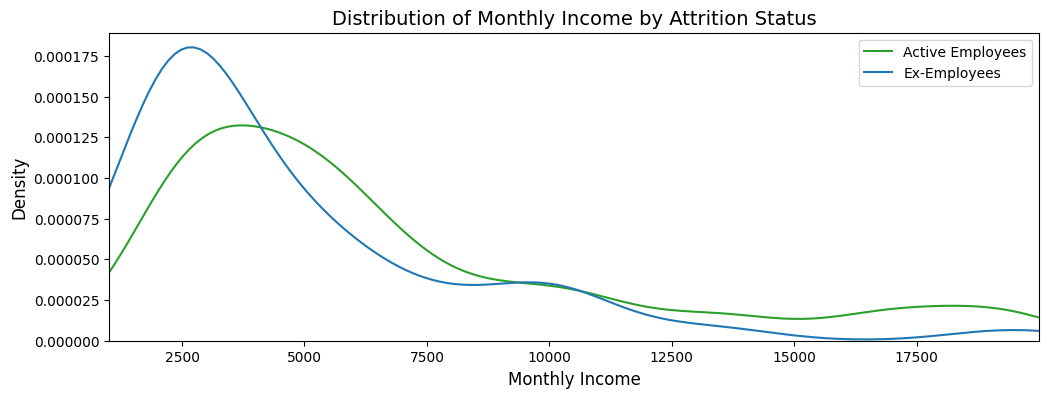

In [222]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.kdeplot(data=target_0, x="MonthlyIncome", fill=False, label="Active Employees", color="#2ca02c")
sns.kdeplot(data=target_1, x="MonthlyIncome", fill=False, label="Ex-Employees", color="#1f77b4")
plt.legend()
plt.xlim(df["MonthlyIncome"].min(), df["MonthlyIncome"].max())
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_2.png", bbox_inches="tight")
plt.show()

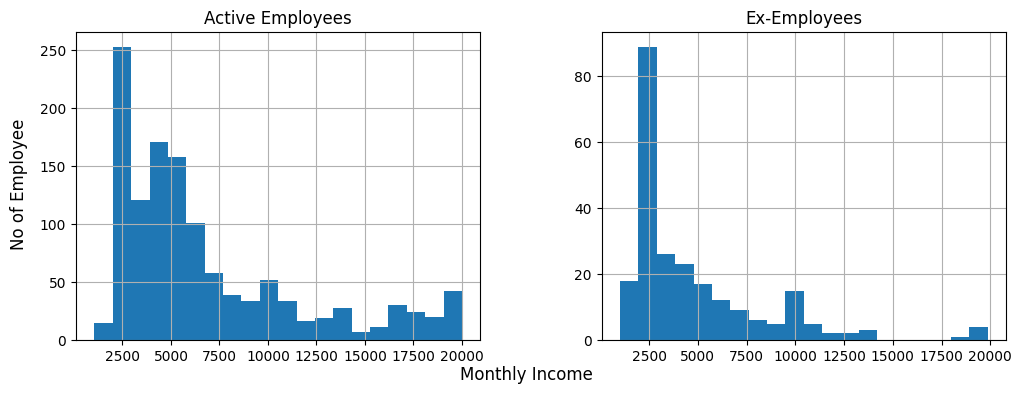

In [223]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['MonthlyIncome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['MonthlyIncome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Monthly Income', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("income_hist.png", bbox_inches="tight")
plt.show()

### Target Variable: Attrition
The feature “Attrition” is what this Machine Learning problem is about. We are trying to predict the value of the feature ‘Attrition’ by using other related features associated with the employee’s personal and professional history.

In the supplied dataset, the percentage of Current Employees is 83.9% and of Ex-employees is 16.1%. Hence, this is an imbalanced class problem.

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [224]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [225]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

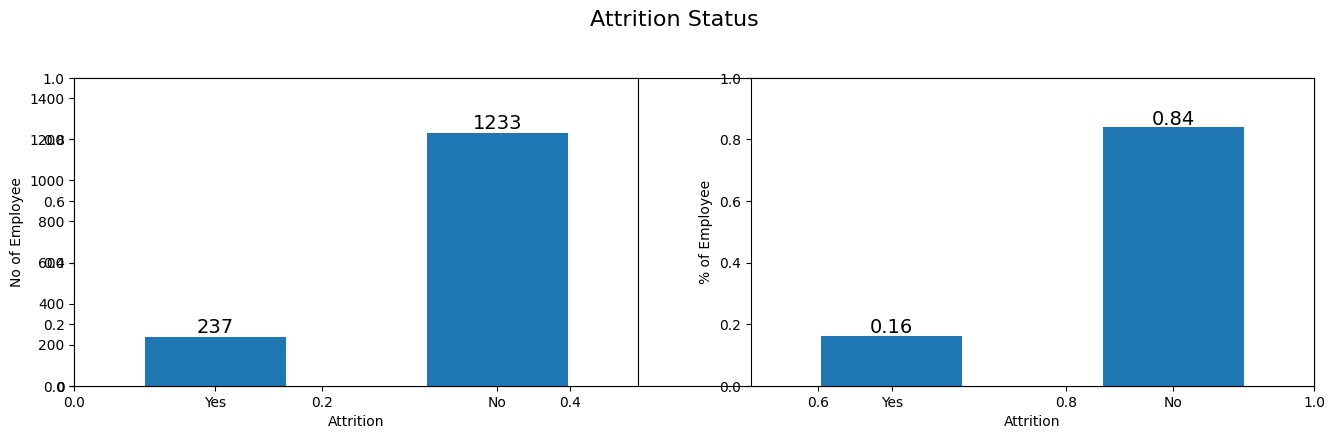

In [226]:
# df['Attrition'].value_counts().plot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df['Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("No of Employee")
plt.ylim(0,1500)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df['Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar( color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("% of Employee")
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
# fig.text(0.5, 0.001, 'Attrition Status', ha='center', fontsize=14)
# fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("att_hist_1.png", bbox_inches="tight")
plt.show()

### Correlation
Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [227]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Convert categorical columns to dummy variables
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

correlations = df_corr_encoded.corr()['Target'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus_Single                0.175419
OverTime_Yes                        0.246118
Target                              1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [228]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Convert categorical columns to dummy variables
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

correlations = df_corr_encoded.corr()['Target'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus_Single                0.175419
OverTime_Yes                        0.246118
Target                              1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [229]:
# compute the correlation matrix
# Make a copy and add the target variable
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

# Drop unnecessary columns
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Select only numeric columns
df_corr_numeric = df_corr.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = df_corr_numeric.corr()

# Show correlation matrix
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


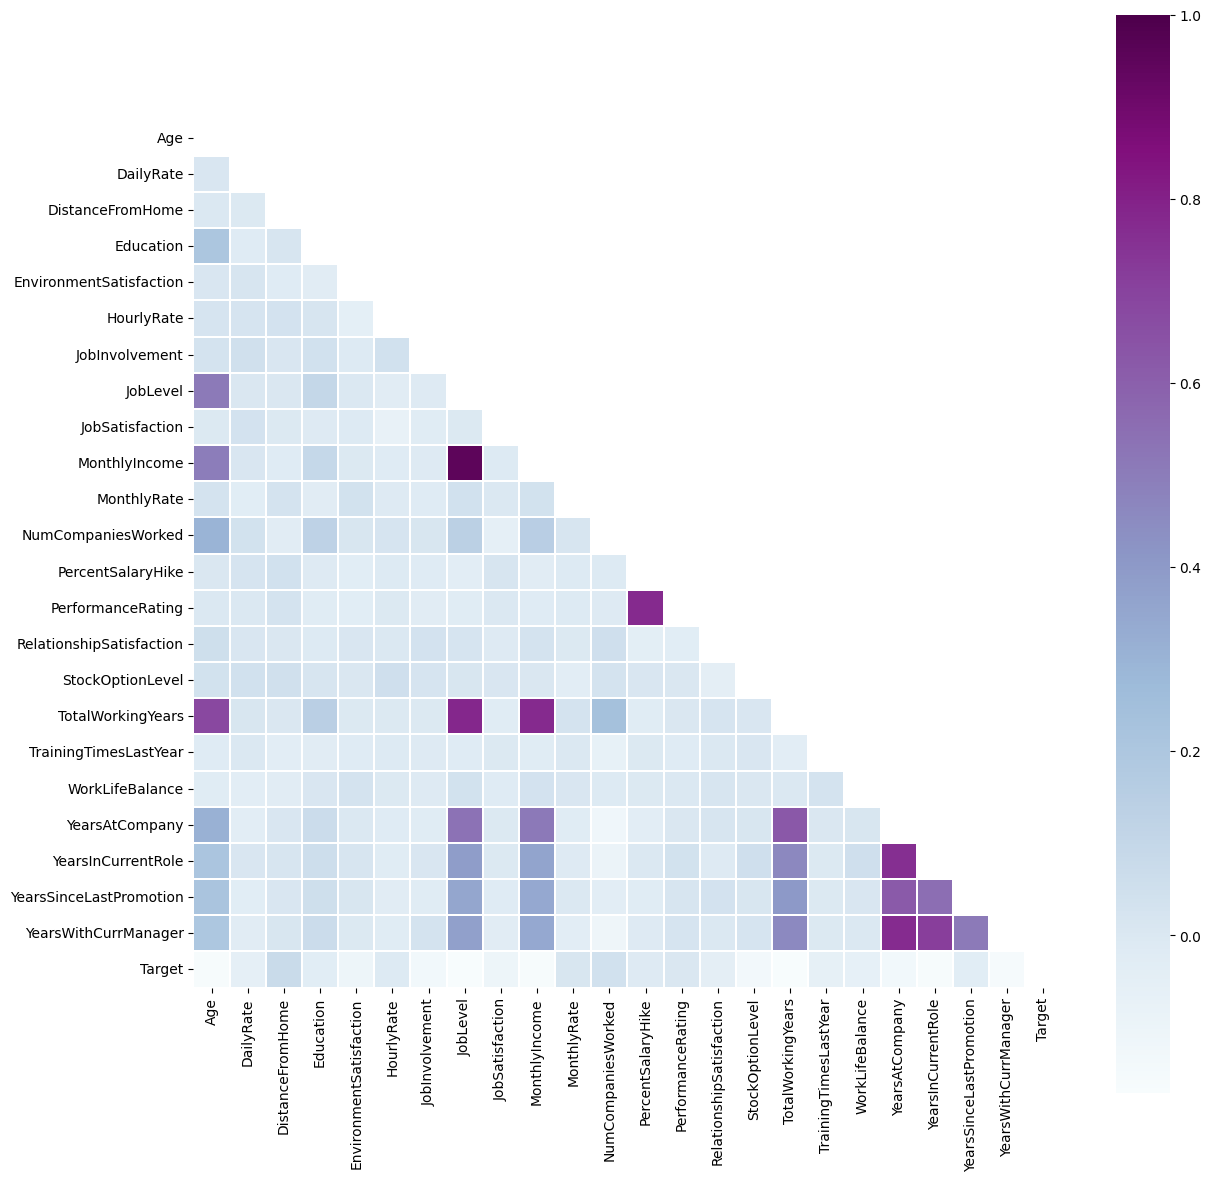

In [230]:
# set figure size
plt.figure(figsize=(14, 14))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="BuPu", linewidths=.1, annot=False, mask=mask)

# fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 
plt.show()

***
# <a name="pre">Pre-processing Pipeline</a>
In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

### Encoding
Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Label Encoding and One-Hot Encoding as shown below.

In [231]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [232]:
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [233]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data = data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus','OverTime']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.head(5)
data.to_csv('LabelEncoded_CleanData.csv')

In [234]:
print(data.shape)
data.head()

(1470, 30)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,6,3,3,2,2,2,2


### Splitting data into training and testing sets
Prior to implementating or applying any Machine Learning algorithms, we must split the dataset into training and testing sets.

In [235]:
# assign the target to a new dataframe and convert it to a numerical type
y = data['Attrition']

In [236]:
print(type(y))
y[:5]

<class 'pandas.core.series.Series'>


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [237]:
# remove the target and redundant features from the dataset
X = data.drop(['Attrition'], axis=1)

In [238]:
print(X.shape)
X.head()

(1470, 29)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,11,3,1,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,23,4,4,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,15,3,2,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,11,3,3,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,12,3,4,6,3,3,2,2,2,2


In [239]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset

# import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)  

In [240]:
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (1102, 29)
Shape of y_train dataset:  (1102,)
Shape of X_test dataset:  (368, 29)
Shape of y_test dataset:  (368,)


In [241]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
619,33,2,586,2,1,3,3,1,1,48,...,22,4,1,9,5,3,9,8,0,8
779,51,2,1323,1,4,4,1,1,1,34,...,12,3,3,18,2,4,10,0,2,7
627,52,1,890,1,25,4,3,3,0,81,...,22,4,3,31,3,3,9,8,0,0
301,18,2,812,2,10,3,3,4,0,69,...,12,3,1,0,2,3,0,0,0,0
308,58,0,390,1,1,4,1,4,1,32,...,13,3,4,12,2,3,5,3,1,2


In [242]:
X_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
655,33,2,1075,0,3,2,0,4,1,57,...,11,3,3,7,4,4,4,3,0,3
857,44,2,1097,1,10,4,1,3,1,96,...,11,3,3,6,4,3,6,4,0,2
861,46,2,1402,2,2,3,2,3,0,69,...,23,4,1,28,2,3,26,15,15,9
1407,24,2,771,1,1,2,1,2,1,45,...,12,3,2,4,2,2,4,3,1,2
744,37,2,1141,1,11,2,3,1,0,61,...,15,3,1,15,2,1,1,0,0,0


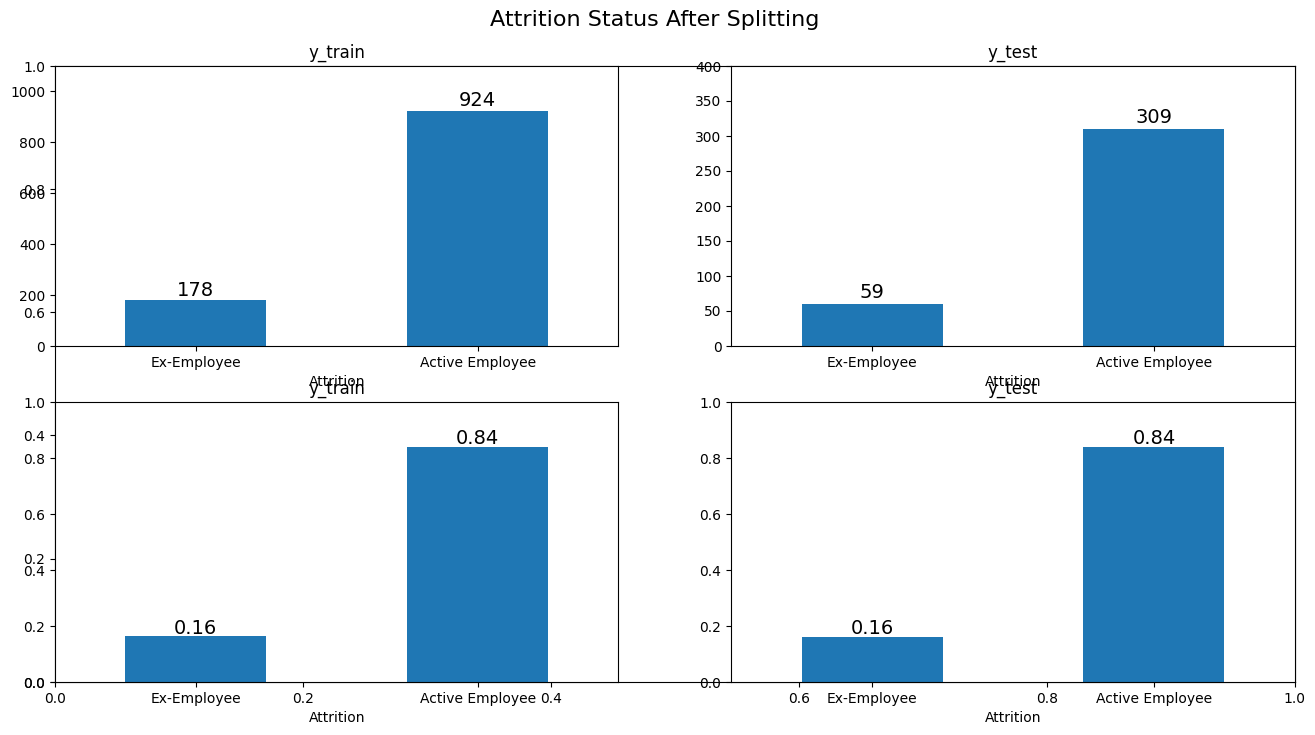

In [243]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g1 = y_train.value_counts().sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1100)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(222)
g2 = y_test.value_counts().sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(223)
g1 = y_train.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = y_test.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

    
# set title and axis labels
plt.suptitle("Attrition Status After Splitting", x=0.5, y=0.95, ha="center", fontsize=16)
# fig.text(0.5, 0.001, "Attrition", ha="center", fontsize=14)
# fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("split_hist.png", bbox_inches="tight")
plt.show()

### Feature Scaling
Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 1. Refer https://stackoverflow.com/questions/50565937/how-to-normalize-the-train-and-test-data-using-minmaxscaler-sklearn.

In [244]:
# import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

In [245]:
# fit the scaler on the TRAINING data and use the scaler to transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [246]:
# use the scaler to transform the TEST data
X_test_scaled = scaler.transform(X_test)

In [247]:
print(X_train_scaled.shape)
X_train_scaled

(1102, 29)


array([[0.35714286, 1.        , 0.34645669, ..., 0.44444444, 0.        ,
        0.47058824],
       [0.78571429, 1.        , 0.87401575, ..., 0.        , 0.13333333,
        0.41176471],
       [0.80952381, 0.5       , 0.56406586, ..., 0.44444444, 0.        ,
        0.        ],
       ...,
       [0.52380952, 0.5       , 0.49319971, ..., 0.38888889, 0.2       ,
        0.41176471],
       [0.45238095, 1.        , 0.27201145, ..., 0.38888889, 0.46666667,
        0.47058824],
       [0.4047619 , 0.5       , 0.40085898, ..., 0.11111111, 0.2       ,
        0.11764706]], shape=(1102, 29))

In [248]:
print(X_test_scaled.shape)
X_test_scaled

(368, 29)


array([[0.35714286, 1.        , 0.69649248, ..., 0.16666667, 0.        ,
        0.17647059],
       [0.61904762, 1.        , 0.71224052, ..., 0.22222222, 0.        ,
        0.11764706],
       [0.66666667, 1.        , 0.9305655 , ..., 0.83333333, 1.        ,
        0.52941176],
       ...,
       [0.11904762, 1.        , 0.31424481, ..., 0.        , 0.        ,
        0.        ],
       [0.30952381, 1.        , 0.84037223, ..., 0.        , 0.        ,
        0.        ],
       [0.9047619 , 0.5       , 0.57551897, ..., 0.38888889, 0.46666667,
        0.41176471]], shape=(368, 29))

***
# <a name="ml">Building Machine Learning Models</a>
## Baseline Algorithms
First, we will use a range of baseline algorithms (using default or out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. Total of 9 algorithms considered in this section: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB, XGBoost, Gradient Boosting, AdaBoost. Then, we will pick the top 2-3 algorithms and further fine-tune their parameter values using GridSearchCV to achieve the best AUC score.

We will evaluate the algorithms based on two metrics:
1. Classification Accuracy is the number of correct predictions made as a ratio of all predictions made. 
 - It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.
<br><br>
2. Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. 
 - The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

In [304]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.exceptions import NotFittedError
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import NotFittedError
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import sklearn
print(sklearn.__version__)

1.6.1


In [309]:
# selection of algorithms to consider and set performance measure
models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", random_state=0)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(("SVM", SVC(gamma="auto", random_state=0)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(random_state=0)))
models.append(("Gaussian NB", GaussianNB()))
models.append(("XGBoost", XGBClassifier(random_state=0)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=0)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=0)))

In [310]:
%%time
# evaluate each model in turn and provide accuracy and standard deviation scores

acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in models:
    # 10-fold cross-validation
    kfold = KFold(n_splits=10, random_state=None)  

    # accuracy scoring
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

CPU times: total: 36.6 s
Wall time: 16.4 s


In [311]:
# sort the results by Accuracy
df_results.sort_values(by=["Accuracy Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
8,AdaBoost,77.63,7.44,86.30,2.88
6,XGBoost,77.90,6.06,86.30,2.80
7,Gradient Boosting,77.66,7.80,85.94,2.83
1,Random Forest,77.39,5.88,85.85,3.52
0,Logistic Regression,78.83,8.40,85.30,3.16
2,SVM,50.00,0.00,83.85,4.05
3,KNN,55.58,9.66,81.41,4.04
5,Gaussian NB,74.98,10.54,80.12,6.07
4,Decision Tree Classifier,59.79,6.83,79.12,2.63


In [312]:
# sort the results by ROC AUC
df_results.sort_values(by=["ROC AUC Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,78.83,8.40,85.30,3.16
6,XGBoost,77.90,6.06,86.30,2.80
7,Gradient Boosting,77.66,7.80,85.94,2.83
8,AdaBoost,77.63,7.44,86.30,2.88
1,Random Forest,77.39,5.88,85.85,3.52
5,Gaussian NB,74.98,10.54,80.12,6.07
4,Decision Tree Classifier,59.79,6.83,79.12,2.63
3,KNN,55.58,9.66,81.41,4.04
2,SVM,50.00,0.00,83.85,4.05


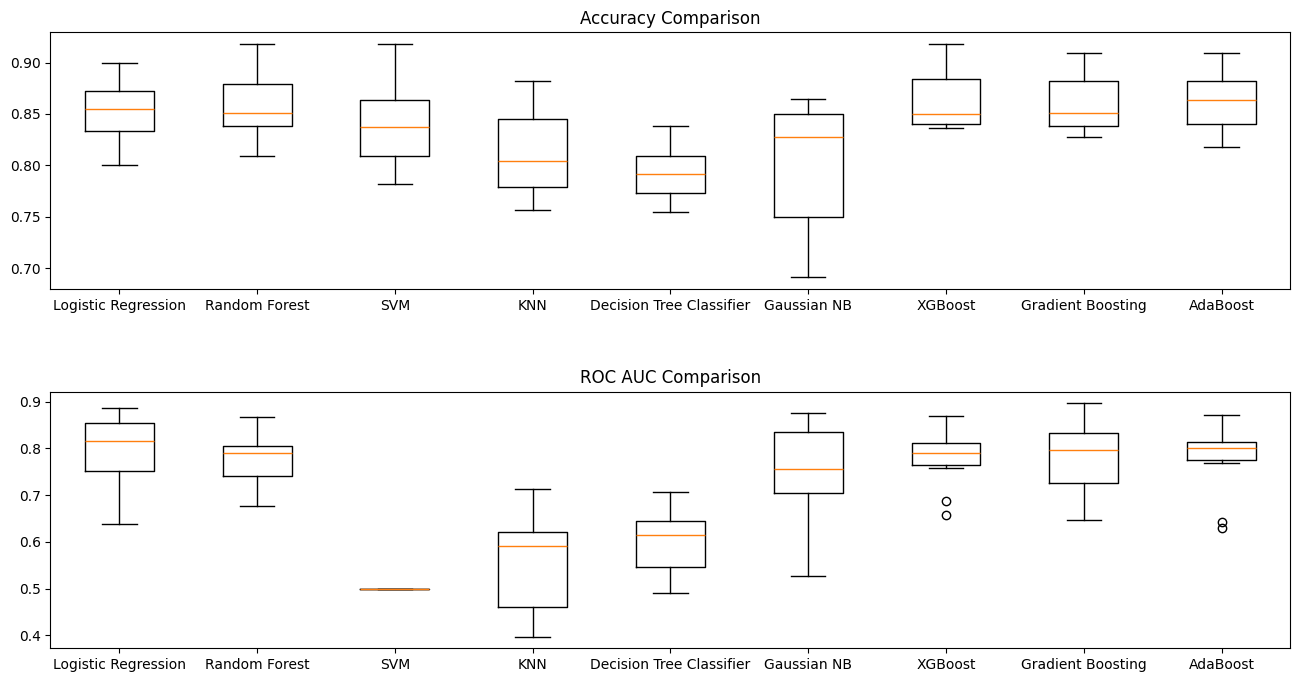

In [313]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(211)
plt.boxplot(acc_results)
ax1.set_xticklabels(names)
plt.title("Accuracy Comparison")

fig.subplots_adjust(hspace=0.4)

ax2 = fig.add_subplot(212)
plt.boxplot(auc_results)
ax2.set_xticklabels(names)
plt.title("ROC AUC Comparison")

# plt.savefig("boxplots.png", bbox_inches="tight")
plt.show()

Based on our Accuracy and ROC AUC comparison analysis, Logistic Regression and XGBoost have the highest mean Accuracy score while Logistic Regression also has the highest mean AUC scores. We will shortlist these two algorithms together with Random Forest for further analysis.

## Logistic Regression

In [314]:
kfold = KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(solver='liblinear', random_state=None)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.88571429 0.85671937 0.80426357 0.63929825 0.85500268 0.74157303
 0.84970238 0.82877193 0.64026403 0.78125   ] 

Average AUC score = 0.7883; standard deviation = 0.0840


#### Fine-tuning
GridSearchCV allows us to fine-tune hyper-parameters by searching over specified parameter values for an estimator. The results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

In [315]:
%%time
param_grid = {"C": np.arange(1e-01, 1.01, 0.1), "class_weight": ["balanced", None]} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(LogisticRegression(solver="liblinear", 
                                         random_state=0),
                                         
                                         return_train_score=True,
                                         param_grid=param_grid,
                                         scoring="roc_auc",
                                         cv=10)

log_gs.fit(X_train, y_train)

print("="*20)
print("best estimator: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print("best score:", log_gs.best_score_)
print("="*20)

best estimator: LogisticRegression(C=np.float64(0.5), random_state=0, solver='liblinear')
best params: {'C': np.float64(0.5), 'class_weight': None}
best score: 0.7997435962073781
CPU times: total: 3.86 s
Wall time: 3.89 s


In [316]:
# make predictions
y_pred = log_gs.predict(X_test)

In [317]:
# calculate accuracy score
logit_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression Classifier on Test set: {:.2f}%'.format(logit_accuracy*100))

Accuracy of Logistic Regression Classifier on Test set: 86.68%


In [318]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       309
           1       0.71      0.29      0.41        59

    accuracy                           0.87       368
   macro avg       0.79      0.63      0.67       368
weighted avg       0.85      0.87      0.84       368



In [319]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = log_gs.predict_proba(X_test)[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(logit_roc_auc))

AUC on Test set: 0.8056058362130437


[[302   7]
 [ 42  17]]


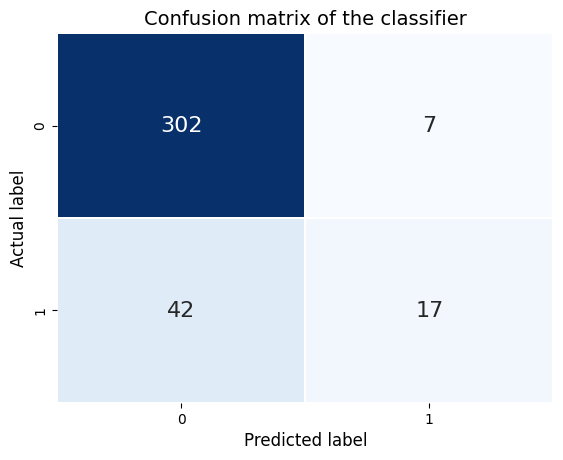

In [320]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

The Confusion matrix is telling us that we have 306+16 correct predictions and 43+3 incorrect predictions. In other words, an accurac of 87.50%.

In [321]:
log_gs.score(X_test, y_test)

np.float64(0.8056058362130437)

In [322]:
log_gs.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'class_weight': ['balanced', None]},
             return_train_score=True, scoring='roc_auc')>

## XGBoost Classifier

In [323]:
kfold = KFold(n_splits=10, random_state=0,shuffle=True)
modelCV = XGBClassifier(random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.74226804 0.81644737 0.735      0.85326087 0.79891304 0.78557875
 0.83611111 0.88791322 0.66555851 0.79506641] 

Average AUC score = 0.7916; standard deviation = 0.0611


#### Fine-tuning
GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator. The results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.
The default parameter values for XGBClassifier are n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0.
<br>Refer https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [324]:
%%time
xgb_classifier = XGBClassifier(random_state=0)

param_grid = {"n_estimators": [100, 150, 200],
              "max_depth": [2, 3, 4],
              "learning_rate":[0.01, 0.1],
              "gamma": [1,2,3]}

xgb_clf = GridSearchCV(xgb_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

xgb_clf.fit(X_train, y_train)




print("="*20)
print("best estimator: " + str(xgb_clf.best_estimator_))
print("best params: " + str(xgb_clf.best_params_))
print("best score:", xgb_clf.best_score_)
print("="*20)

best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)
best params: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
best score: 0.8082352864786246
CPU times: total: 9min 52s
Wall time: 40.2 s


In [325]:
# get feature importances
importances = xgb_clf.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,0.095747
1,JobLevel,0.092927
2,TotalWorkingYears,0.073596
3,MonthlyIncome,0.064211
4,YearsInCurrentRole,0.052363
5,MaritalStatus,0.049318
6,Age,0.046075
7,NumCompaniesWorked,0.037293
8,YearsWithCurrManager,0.036561
9,EnvironmentSatisfaction,0.033389


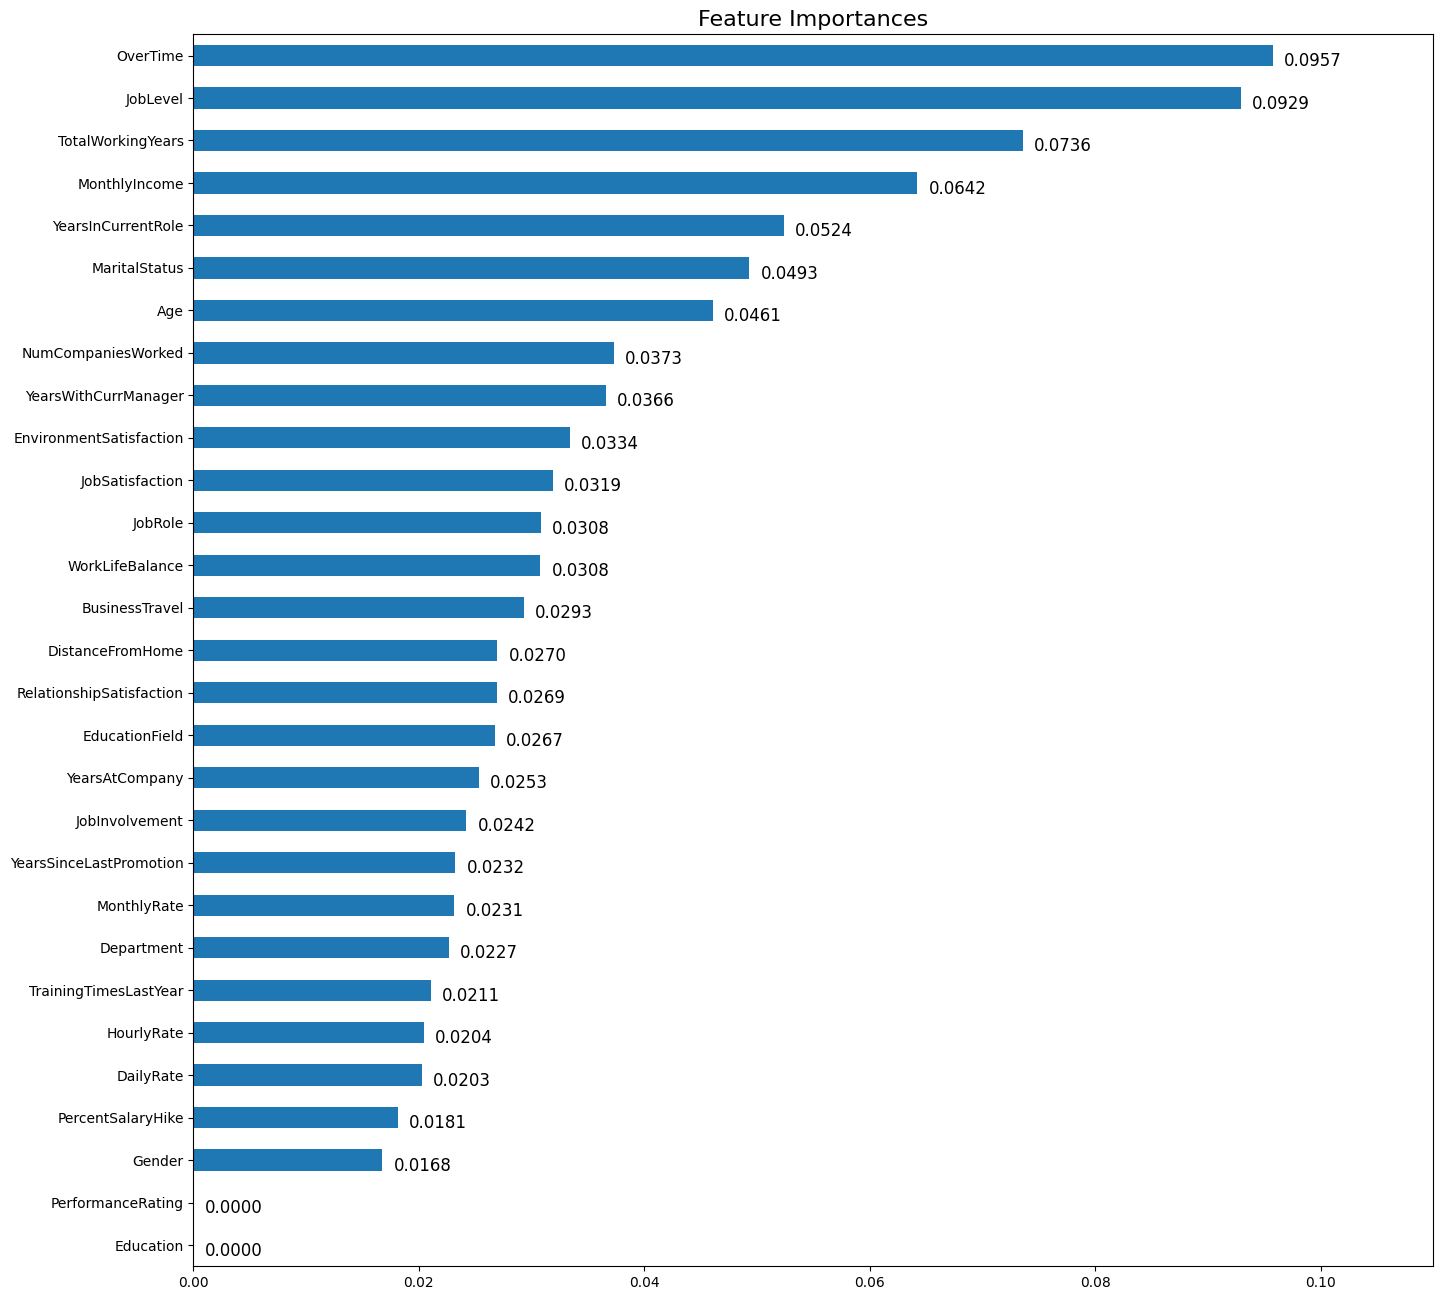

In [326]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.11)
feat_importances = pd.Series(xgb_clf.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="#1f77b4")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=12)
    
# plt.savefig("xgb_f.png", bbox_inches="tight")
plt.show()

In [327]:
# make predictions
y_pred = xgb_clf.predict(X_test)

In [328]:
# calculate accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of XGBoost Classifier on test set: {:.2f}%'.format(xgb_accuracy*100))

Accuracy of XGBoost Classifier on test set: 87.50%


In [329]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.84      0.27      0.41        59

    accuracy                           0.88       368
   macro avg       0.86      0.63      0.67       368
weighted avg       0.87      0.88      0.85       368



In [330]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on test set: {}".format(xgb_roc_auc))

AUC on test set: 0.8178377488892546


[[306   3]
 [ 43  16]]


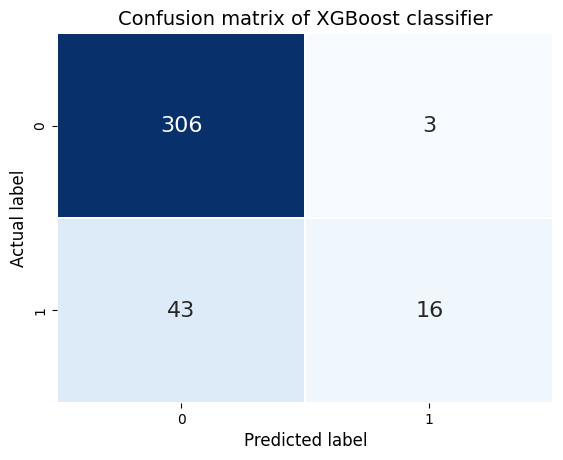

In [331]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of XGBoost classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

The Confusion matrix is telling us that we have 306+18 correct predictions and 41+3 incorrect predictions. In other words, an accurac of 88.04%.

In [332]:
xgb_clf.score(X_test, y_test)

np.float64(0.8178377488892546)

In [333]:
xgb_clf.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=No...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=No

## Random Forest Classifier

In [334]:
kfold = KFold(n_splits=10, random_state=None)
modelCV = RandomForestClassifier(n_estimators=100, random_state=None)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.85467033 0.75370553 0.76356589 0.6754386  0.86623863 0.80979133
 0.81324405 0.79578947 0.76567657 0.76595745] 

Average AUC score = 0.7864; standard deviation = 0.0521


In [335]:
%%time
rf_classifier = RandomForestClassifier(random_state=0)

param_grid = {"n_estimators": [150, 200, 250],
              "min_samples_split":[2,4,6],
              "min_samples_leaf": [1, 2],
#               "max_depth": [5, 10, 15, 20, 25],
              "class_weight": ["balanced", None]}

grid_obj = GridSearchCV(rf_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print("="*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print("best score:", grid_obj.best_score_)
print("="*20)

best estimator: RandomForestClassifier(n_estimators=150, random_state=0)
best params: {'class_weight': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
best score: 0.8026422997124673
CPU times: total: 2min 23s
Wall time: 2min 24s


In [336]:
# get feature importances
importances = grid_obj.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.087008
1,DailyRate,0.062448
2,OverTime,0.059166
3,Age,0.057074
4,MonthlyRate,0.056851
5,TotalWorkingYears,0.054219
6,HourlyRate,0.049200
7,DistanceFromHome,0.045371
8,YearsAtCompany,0.039114
9,NumCompaniesWorked,0.037925


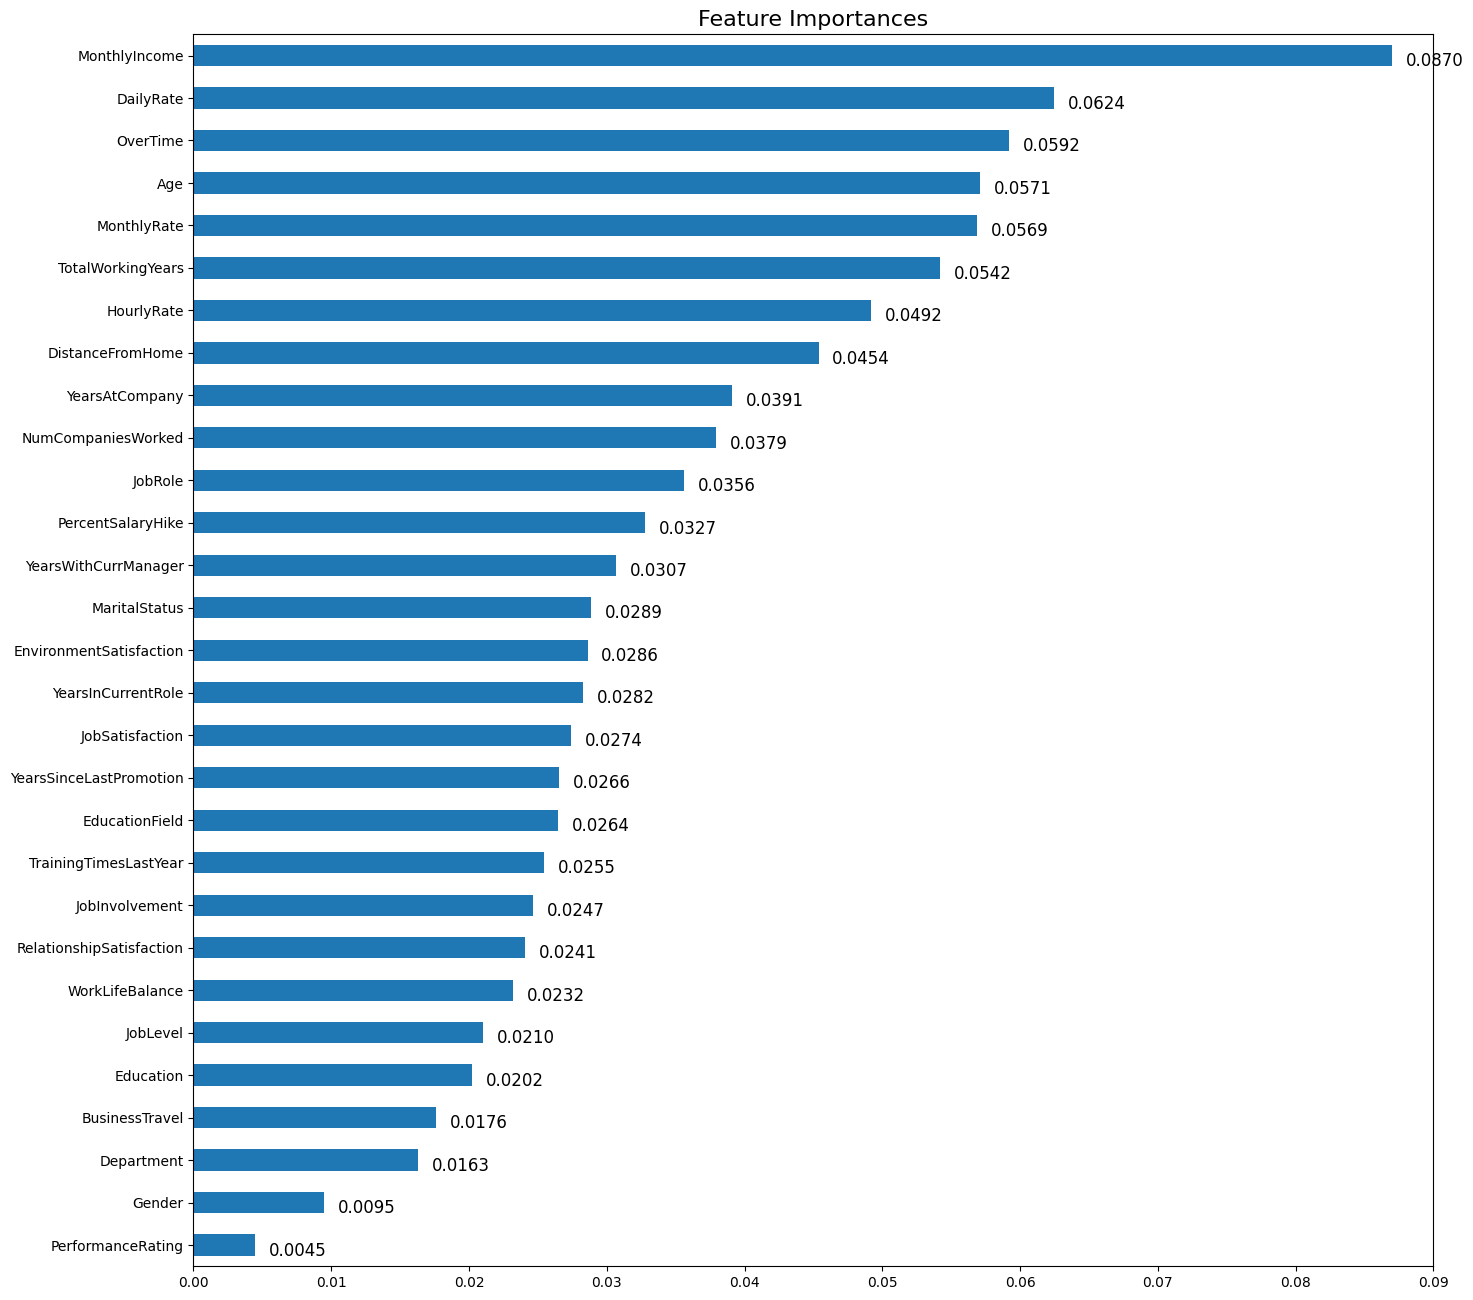

In [337]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.09)
feat_importances = pd.Series(grid_obj.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="#1f77b4")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=12)
    
# plt.savefig("rf_f.png", bbox_inches="tight")
plt.show()

In [338]:
# make predictions
y_pred = grid_obj.predict(X_test)

In [339]:
# calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest Classifier on Test set: {:.2f}%'.format(rf_accuracy*100))

Accuracy of Random Forest Classifier on Test set: 85.33%


In [340]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       0.86      0.10      0.18        59

    accuracy                           0.85       368
   macro avg       0.86      0.55      0.55       368
weighted avg       0.85      0.85      0.80       368



In [341]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = grid_obj.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(rf_roc_auc))

AUC on Test set: 0.8073336624430915


[[308   1]
 [ 53   6]]


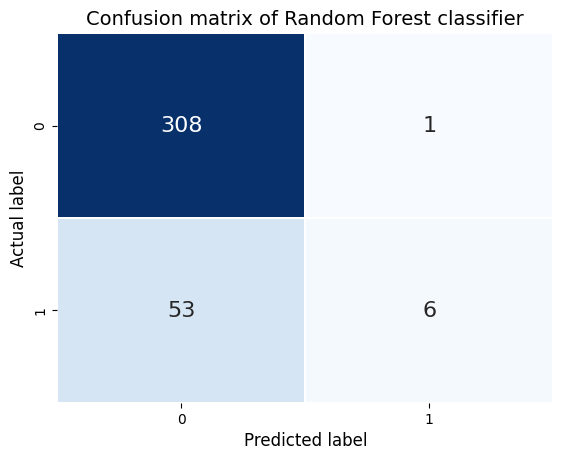

In [342]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of Random Forest classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("rf_cm.png", bbox_inches="tight")
plt.show()

The Confusion matrix is telling us that we have 308+6 correct predictions and 53+1 incorrect predictions. In other words, an accurac of 85.33%.

## ROC Curves
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much a model is capable of distinguishing between classes. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 

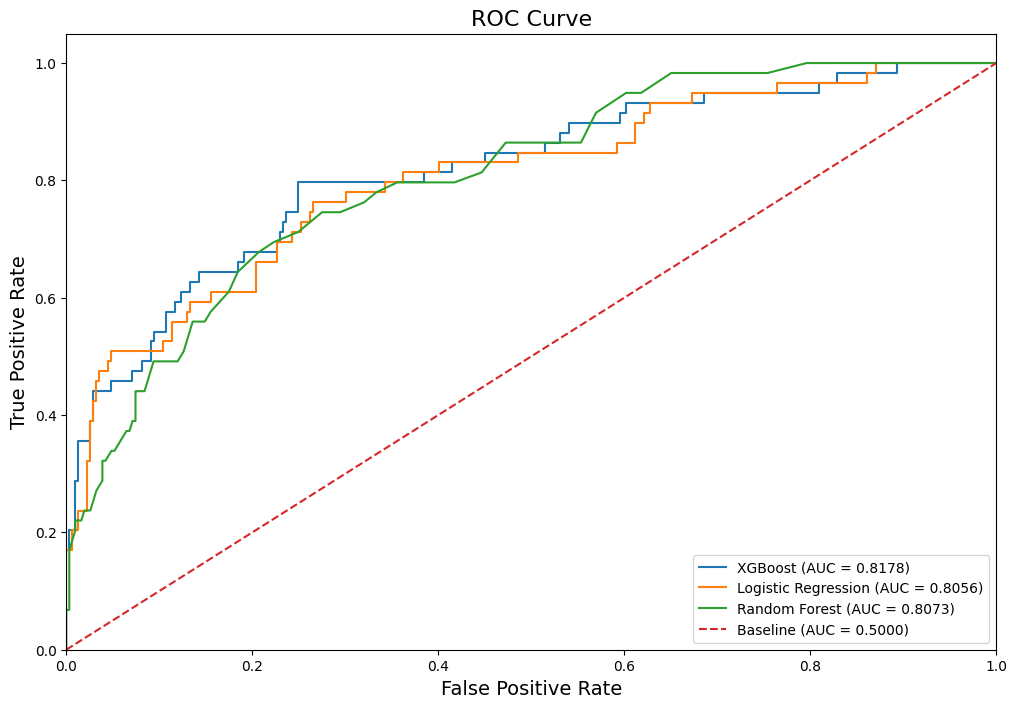

In [343]:
# create ROC curves
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_gs.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_obj.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label="XGBoost (AUC = {:1.4f})".format(xgb_roc_auc))
# plot Logistic Regression ROC
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:1.4f})".format(logit_roc_auc))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
# plt.savefig("roc.png", bbox_inches="tight")
plt.show()

In [344]:
grid_fit.score(X_test, y_test)

np.float64(0.8073336624430915)

In [345]:
grid_fit.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [150, 200, 250]},
             scoring='roc_auc')>

In [346]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

In [347]:
class my_classifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

In [348]:
pipe = Pipeline([ ('clf', my_classifier())])
parameters = [
             {'clf':[RandomForestClassifier()],
             'clf__n_estimators': [75, 100, 125,],
             'clf__min_samples_split': [2,4,6],
             'clf__max_depth': [5, 10, 15,]
             },
           ]

In [349]:
grid = GridSearchCV(pipe, parameters, cv=5, scoring='roc_auc')
grid.fit(X_train,y_train)
#
model = grid.best_estimator_
score = grid.best_score_

In [350]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'The ROC-AUC for test data is found to be {roc_auc}')

The ROC-AUC for test data is found to be 0.5492293346497724


In [351]:
print(X_train.columns.tolist())

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [352]:
['Age', 'DailyRate', 'DistanceFromHome', 'BusinessTravel', 'Department', 'EducationField']

['Age',
 'DailyRate',
 'DistanceFromHome',
 'BusinessTravel',
 'Department',
 'EducationField']

In [353]:
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome']
categorical_features = ['BusinessTravel', 'Department', 'EducationField']

In [354]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [355]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb_classifier', XGBClassifier())
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField'])])),
                ('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               co...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [363]:
model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)
model.save_model("xgb_model.json") 


In [357]:
model.score(X_test, y_test)

0.8586956521739131

In [358]:
print(model.get_booster().feature_names)

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [359]:
print(X_train.columns.tolist())

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [360]:
numeric_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

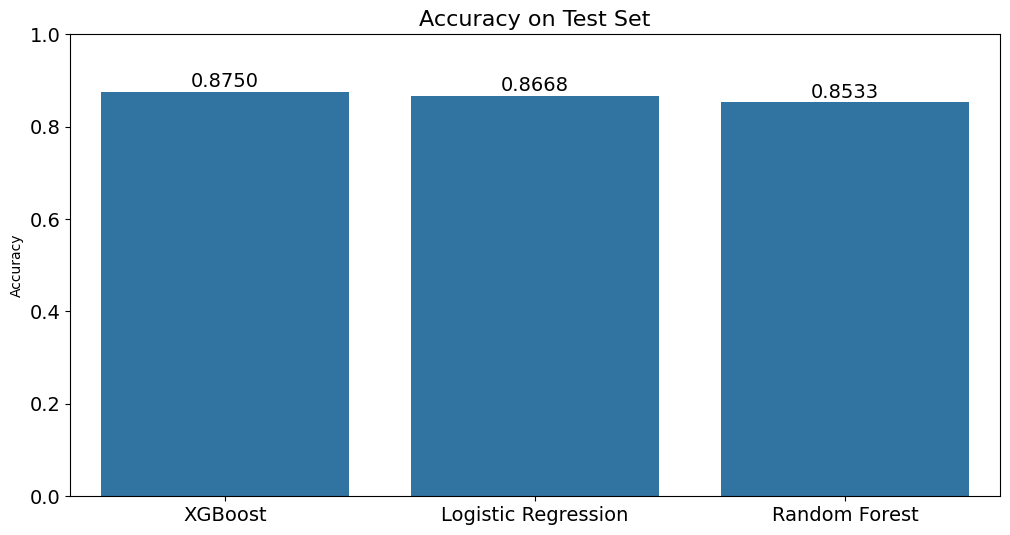

In [361]:
# combine all models' results into one dataframe
data = {"Model": ["XGBoost", "Logistic Regression", "Random Forest"], 
        "Accuracy": [xgb_accuracy, logit_accuracy, rf_accuracy]}

results = pd.DataFrame(data=data)
results


plt.figure(figsize=(12, 6))

plt.title("Accuracy on Test Set", fontsize=16)
g1 = sns.barplot(x="Model", y="Accuracy", data=results)
plt.ylim(0, 1)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.4f}".format(height), ha="center", fontsize=14) 
    
# plt.savefig("acc_results.png", bbox_inches="tight")
plt.show()

# As shown above, the fine-tuned XGBoost model showed a higher AUC score compared to Logistic Regression and Random Forest Classifier. 


# <a name="conclusion">Discussion and Conclusion</a> #
Comparing the 9 different algorithms with default parameter values (before fine-tuning), Logistic Regression has the best accuracy score (0.8730) and the best ROC AUC (0.8141). After fine-tuning the parameter values, XGBoost performed the best with the highest accuracy (0.8804) and ROC AUC (0.8219) on Test set. It is not surprising that XGBoost is an algorithm that has recently been dominating Kaggle competitions. According to the [author of XGBoost](https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting), both XGBoost and GBM follows the principle of gradient boosting.  There are however, the difference in modeling details. Specifically,  xgboost used a more regularized model formalization to control over-fitting, which gives it better performance. The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost. For model, it might be more suitable to be called as regularized gradient boosting.


## Risk Category, Indicators and Strategic Retention Plan
#### Risk Category
As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.

Employees can be assigning a "Risk Category" based on the predicted probability of leaving the company:

- Low-risk for employees with probability < 0.6
- Medium-risk for employees with probability between 0.6 and 0.8
- High-risk for employees with probability > 0.8 

#### Strategic Retention Plan
The stronger indicators of people leaving include:
- Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
- Over Time: people who work overtime are more likely to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
- Age: Employees in relatively young age bracket 25–35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
- DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
- TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving.
- YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.
- YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year.
- WorkLifeBalance: Employees who had "Bad" Work-Life Balance are more likely to leave the company. Hence, efforts should be made to improve the work life balance of the employees such as limiting the hours of overtime, flexible working hours, option of working from home, and so on.

Several metrics can be used here to determine whether action should be taken with a Line Manager:

- number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
- Patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.



A strategic "Retention Plan" should be drawn for each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.

If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

***
### References
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://xgboost.readthedocs.io/en/latest/python/python_api.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d
- https://smallbusiness.chron.com/employee-turnover-vs-attrition-15846.html
- https://recruitloop.com/blog/7-ways-reduce-employee-attrition/

In [362]:
import xgboost
print(xgboost.__version__)

3.0.2


In [ ]:
import sys
print(sys.executable)